#**Final Project 2025 - Obesity Levels Prediction**
**Student:** Daud Rusyad Nurdin, DA/DS bootcamp Dibimbing.id, batch 34



# **Library Preparation**

In [ ]:
# Library data
import numpy as np #number
import pandas as pd

# Library grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Library preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# additional
import shap
import time

# Menghilangkan warning yang tidak perlu
import warnings
warnings.filterwarnings('ignore')

#**Exploratory Data Analysis (EDA)**

##**Data Understanding**

###**Read Data**

In [ ]:
# Read data set from github
file_name = "ObesityDataSet_raw_and_data_sinthetic.csv"
def load_data():
    url = "https://raw.githubusercontent.com/daudrusyadnurdin/final-project-2025/main/data/" + file_name
    return pd.read_csv(url)

df = load_data()

###**Data Structure**
Source:

Dataset Characteristics|Subject Area|Associated Tasks
-----------------------|------------|----------------
Multivariate|Health and Medicine|Classification, Regression, Clustering

Variable Name|	Role|	Type|	Description|	Min |	Max
-------------|-----|-----|------------|-------|-----------
Gender|	Feature|	Categorical > Nominal Binary|	Gender [Male, Female] |		no	|no
Age|	Feature|	Continuous|	Age|	14.0	| 61.0
Height|	Feature|	Continuous| height	|	1.45 | 1.98
Weight|	Feature|	Continuous|	Weight	|	39.0 | 173.0
family_history_with_overweight|	Feature|	Categorical > Nominal Binary|		Has a family member suffered or suffers from overweight? [Yes, No] |	no	|no
FAVC|	Feature|	Categorical > Nominal Binary|		Do you eat high caloric food frequently? [Yes, No]	|	no | no
FCVC|	Feature|	Integer --> Continous | Do you usually eat vegetables in your meals? --> How many times?	| 1.0	| 3.0
NCP|	Feature|	Continuous|		How many main meals do you have daily?	| 1.0	| 4.0
CAEC|	Feature|	Categorical > Ordinal |		Do you eat any food between meals? <br> [No → Sometimes → Frequently → Always]	| no | no
SMOKE|	Feature|	Categorical > Nominal Binary |		Do you smoke?	[Yes, No] | no	| no
CH2O|	Feature|	Continuous|		How much water do you drink daily?	| 1.0 | 3.0
SCC|	Feature|	Categorical > Nominal Binary|		Do you monitor the calories you eat daily?	[Yes, No] | no |	no
FAF|	Feature|	Continuous|		How often do you have physical activity?	| 0.0 |	3.0
TUE|	Feature|	Integer --> Continous |		How much time do you use technological devices <br> such as cell phone, videogames, television, computer <br> and others?	| 0.0 |	2.0
CALC|	Feature|	Categorical	> Ordinal |	How often do you drink alcohol?	<br> [No → Sometimes → Frequently → Always] | no |	no
MTRANS|	Feature|	Categorical > Nominal Non-Binary	|	Which transportation do you usually use?	<br> [Public_Transportation, Automobile, Motorbike, Bike, Walking] | no |	no
NObeyesdad|	Target|	Categorical > Ordinal	|	Obesity level <br> [Insufficient_Weight → Normal_Weight <br> → Overweight_Level_I → Overweight_Level_II <br> → Obesity_Type_I → Obesity_Type_II → Obesity_Type_III>]	| no |	no

###**Dataset Size**

In [ ]:
# Count the number of rows and columns
df.shape
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset has 2111 rows and 17 columns.


In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


###**General Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Rename column name too long
family_history_with_overweight --> FHOW

In [ ]:
# Rename column name family_history_with_overweight to FHWO
df.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True)

###**Categorical Values**

In [ ]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

In [ ]:
# check unique value of each categorical column
cols_cat = df_cat.columns
for col in cols_cat:
    print(f"{df_cat[col].value_counts()}")
    print("------------------------")


Gender
Male      1068
Female    1043
Name: count, dtype: int64
------------------------
FHWO
yes    1726
no      385
Name: count, dtype: int64
------------------------
FAVC
yes    1866
no      245
Name: count, dtype: int64
------------------------
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
------------------------
SMOKE
no     2067
yes      44
Name: count, dtype: int64
------------------------
SCC
no     2015
yes      96
Name: count, dtype: int64
------------------------
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
------------------------
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
------------------------
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
O

**Data Anaysis:**
Feature | Categorical Type | Encoding | Values
--------|------------------|----------|-------
Gender | 	Nominal/Binary | Label | Male, Female
FHWO | 	Nominal/Binary | Label | Yes, No
FAVC | 	Nominal/Binary | Label | Yes, No
CAEC | Ordinal | Label | No → Sometimes → Frequently → Always <br> ordinal_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
SMOKE |		Nominal/Binary	| Label | Yes, No
SCC	|	Nominal/Binary	| Label | Yes, No
CALC |	Ordinal | Label | No → Sometimes → Frequently → Always <br> ordinal_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
MTRANS | Nominal/non-Binary | One-Hot | Public_Transportation, Automobile,  Motorbike, Bike, Walking
NObeyesdad | Ordinal |	Label | Insufficient_Weight → Normal_Weight <br> → Overweight_Level_I → Overweight_Level_II <br> → Obesity_Type_I → Obesity_Type_II → Obesity_Type_III

Next, two source DataFrames will be created to separately handle the encoding of ordinal categories.


###**General Statistic**

In [ ]:
df_num.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## **Data Quality**

###**Data Balance**

In [ ]:
# Chek balance data relative to target
df['NObeyesdad'].value_counts(normalize=True)*100

,proportion
NObeyesdad,
Obesity_Type_I,16.627191
Obesity_Type_III,15.348176
Obesity_Type_II,14.069162
Overweight_Level_I,13.737565
Overweight_Level_II,13.737565
Normal_Weight,13.595452
Insufficient_Weight,12.884889


###**Duplicate Data**

In [ ]:
# Check duplicate data
x = df.duplicated().sum()

if x == 0:
  print("There is no duplicate data.")
else:
  print(f"There are {x} duplicate data.")

There are 24 duplicate data.


In [ ]:
# Display duplicate data for checking
df[df.duplicated()]

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


###**Missing Value**

In [ ]:
# Check missing value
cols = df.select_dtypes(include=np.number).columns
i = 0
for col in cols:
    if df[col].isnull().sum() > 0:
      i += 1
      print(f"{col}: {df[col].isnull().sum()}")

if i == 0:
  print("There is no missing value.")
else:
  print(f"There are {i} missing value.")


There is no missing value.


###**Outliers**

In [ ]:
# Chek outliers by IQR
def check_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  if len(outliers) > 0:
    print(f"There is/are {len(outliers)} outliers in '{col}'.")
    print(f"Lower bound: {lower_bound:.2f}\nUpper bound: {upper_bound:.2f}")
    print(f"Min outlier: {outliers[col].min():.2f}")
    print(f"Max outlier: {outliers[col].max():.2f}")
    print("---------------------------------\n")

In [ ]:
for col in df_num.columns:
  check_outliers(df_num, col)

There is/are 168 outliers in 'Age'.
Lower bound: 10.87
Upper bound: 35.08
Min outlier: 35.13
Max outlier: 61.00
---------------------------------

There is/are 1 outliers in 'Height'.
Lower bound: 1.42
Upper bound: 1.98
Min outlier: 1.98
Max outlier: 1.98
---------------------------------

There is/are 1 outliers in 'Weight'.
Lower bound: 2.54
Upper bound: 170.37
Min outlier: 173.00
Max outlier: 173.00
---------------------------------

There is/are 579 outliers in 'NCP'.
Lower bound: 2.15
Upper bound: 3.51
Min outlier: 1.00
Max outlier: 4.00
---------------------------------



**Outliers Analysis:**
Feature |	Min/Max <br> Outlier	| Lower/Upper <br> Bound	| Should it be removed?
--------|-----------------|-------------------|----------------------
Age |	35.13 – 61 |	10.87 – 35.08	| Some values > 35.08 → possibly reasonable <br> (e.g., adult dataset up to 60 years).
Height |	1.98	| 1.42 – 1.98	| 1.98 exceeds the upper bound. <br> It's still possible a person with this height.
Weight |	173	| 2.54 – 170.37	| 173 > 170.37, only 1 record → It's also possible.
NCP	| 1 – 4	| 2.15 – 3.51	| 579 outliers → Check the data below. <br> But no problem, → it's possible.

*) NCP = How many main meals do you have daily?

In [ ]:
# Check the data with heigh = 173 kg --> in fact, his obesity level = Obesity Type III (the highest level)
df[df['Weight'] >= 173]

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
344,Male,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


**Conclusion:**
- No need to drop outliers.

###**Data Distribution and Univariate Analysis**

In [ ]:
def plot_diagram (col, df):
  sns.set(style="whitegrid")

  # Buat figure dan 3 subplot sejajar
  fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 baris, 3 kolom

  # -----------------------------
  # Histogram + KDE
  # -----------------------------
  sns.histplot(df[col], bins=20, kde=True, color='skyblue', ax=axes[0])
  axes[0].set_title("Histogram + KDE")
  axes[0].set_xlabel(col)
  axes[0].set_ylabel("Frequency")

  # -----------------------------
  # Boxplot
  # -----------------------------
  sns.boxplot(y=df[col], color='lightgreen', ax=axes[1])
  axes[1].set_title("Boxplot")
  axes[1].set_ylabel(col)
  axes[1].set_xlabel("")

  # -----------------------------
  # Violin plot
   # -----------------------------
  sns.violinplot(y=df[col], color='lightcoral', ax=axes[2])
  axes[2].set_title("Violin Plot")
  axes[2].set_ylabel(col)
  axes[2].set_xlabel("")

  # Tampilkan figure
  plt.tight_layout()
  plt.show()


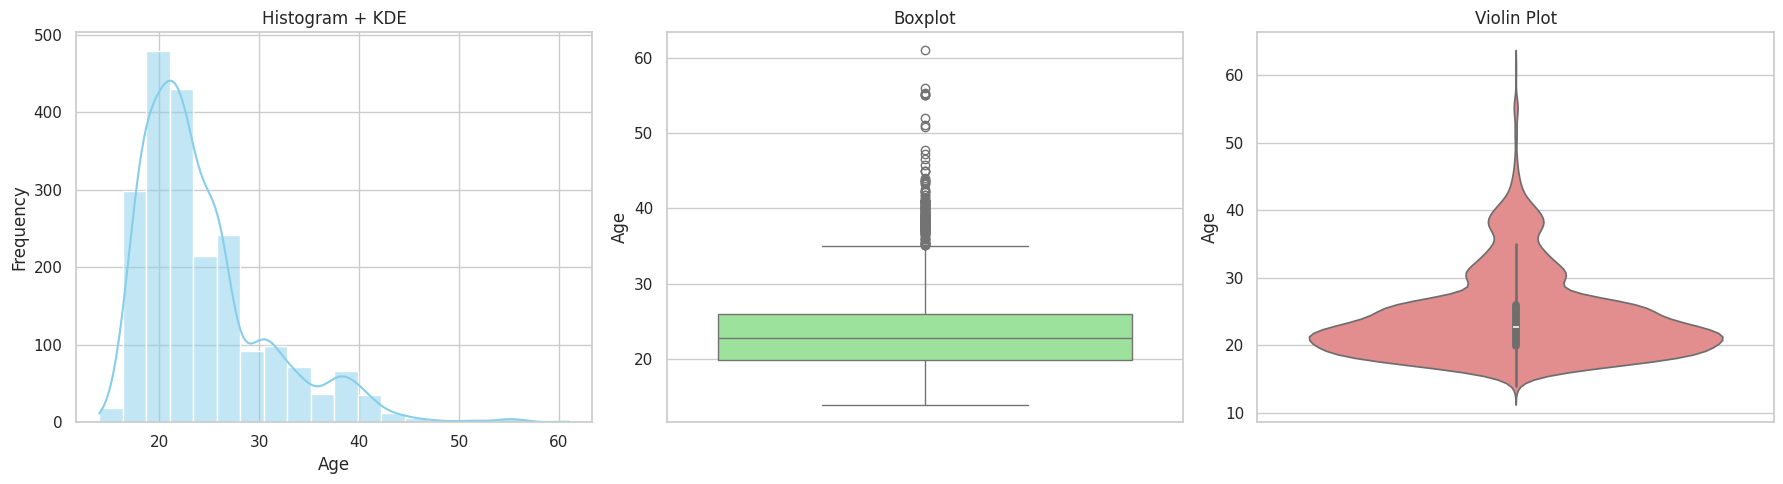

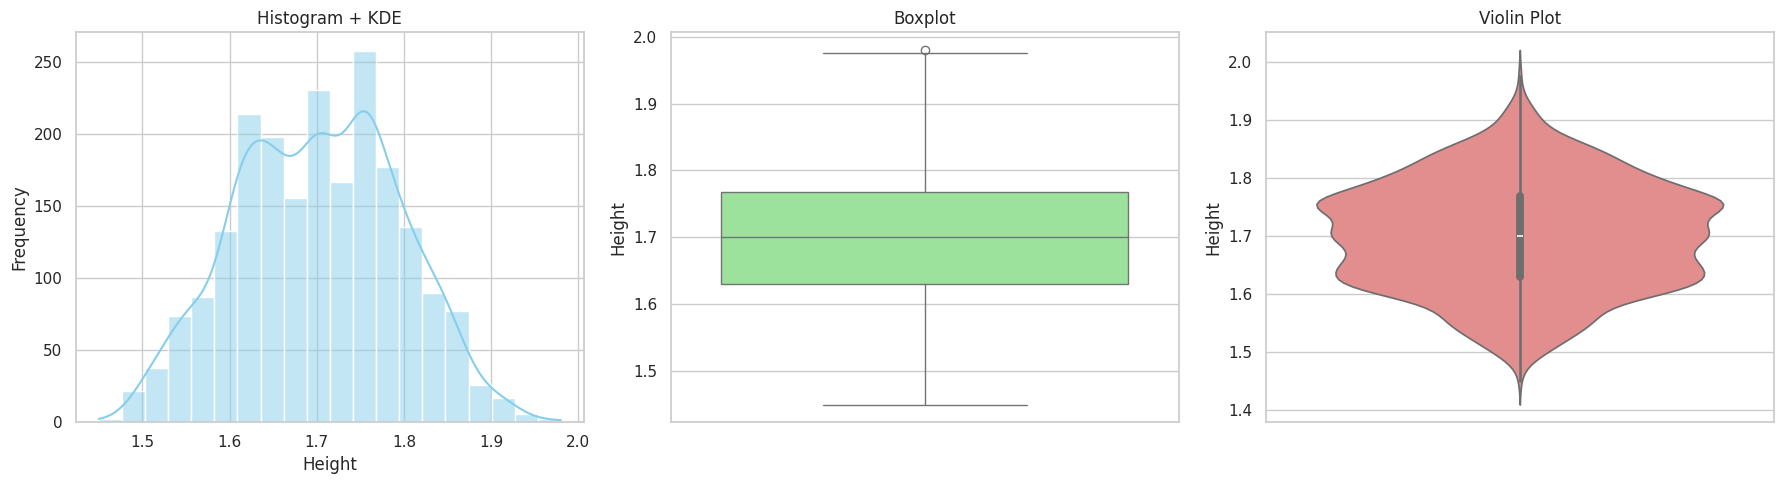

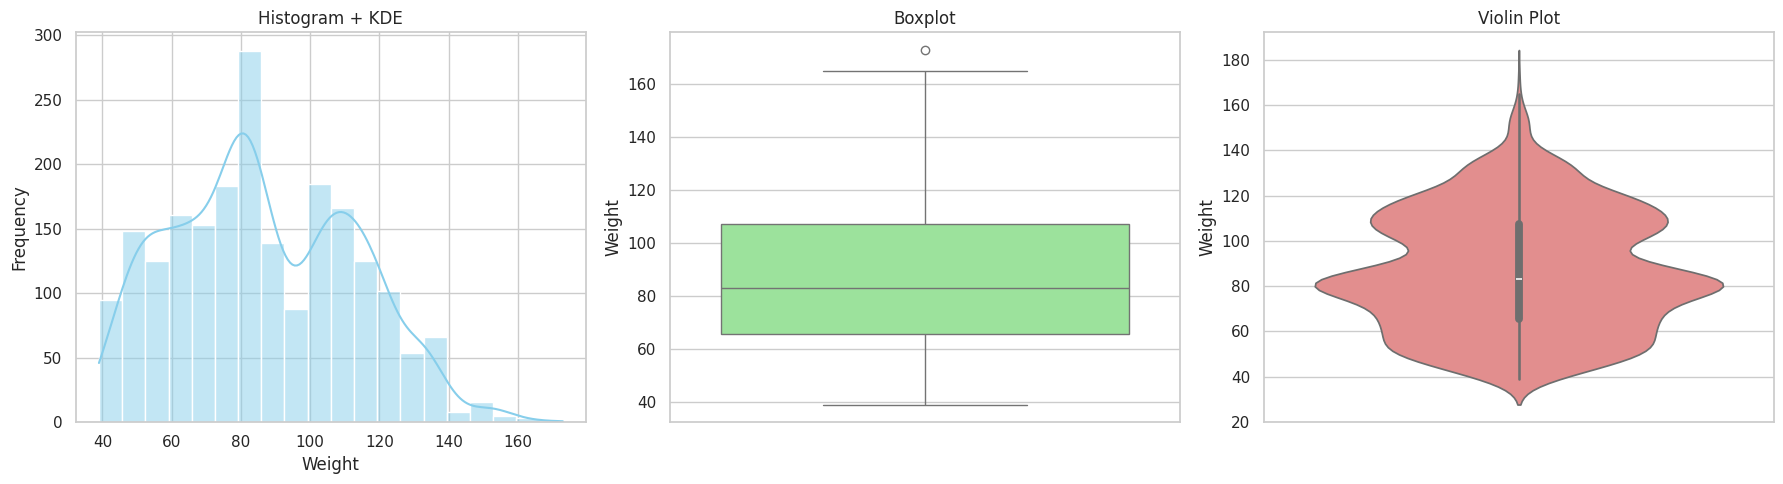

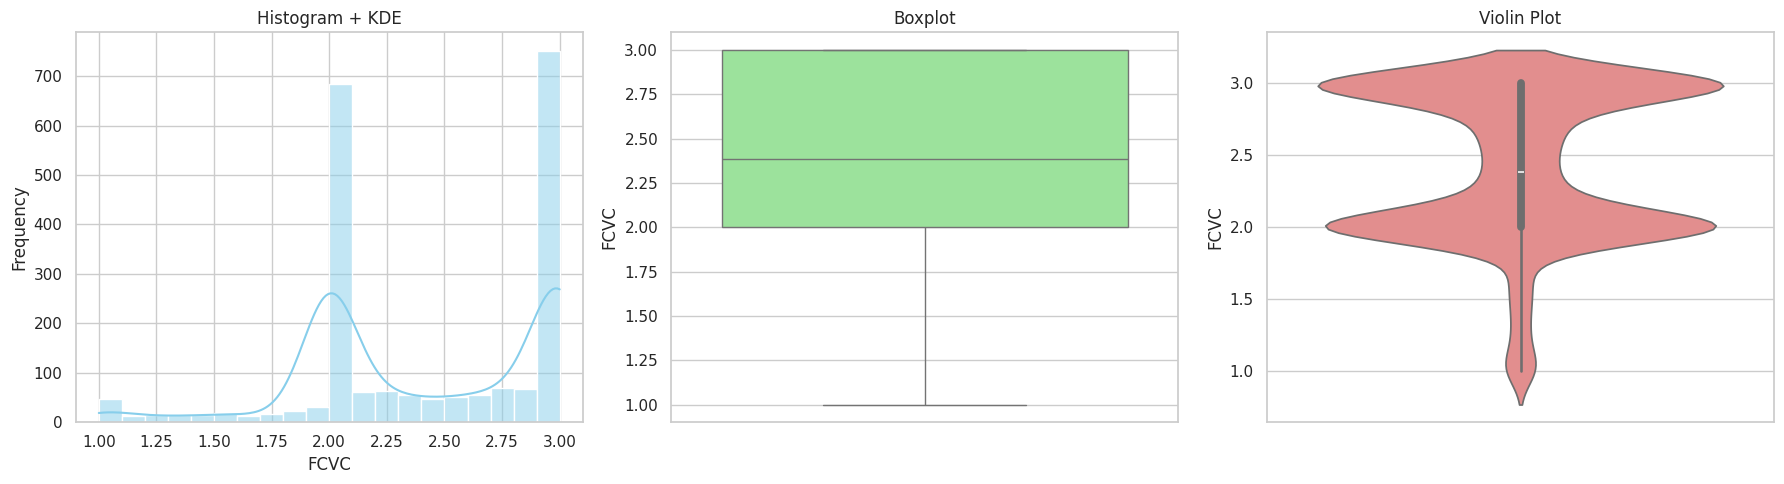

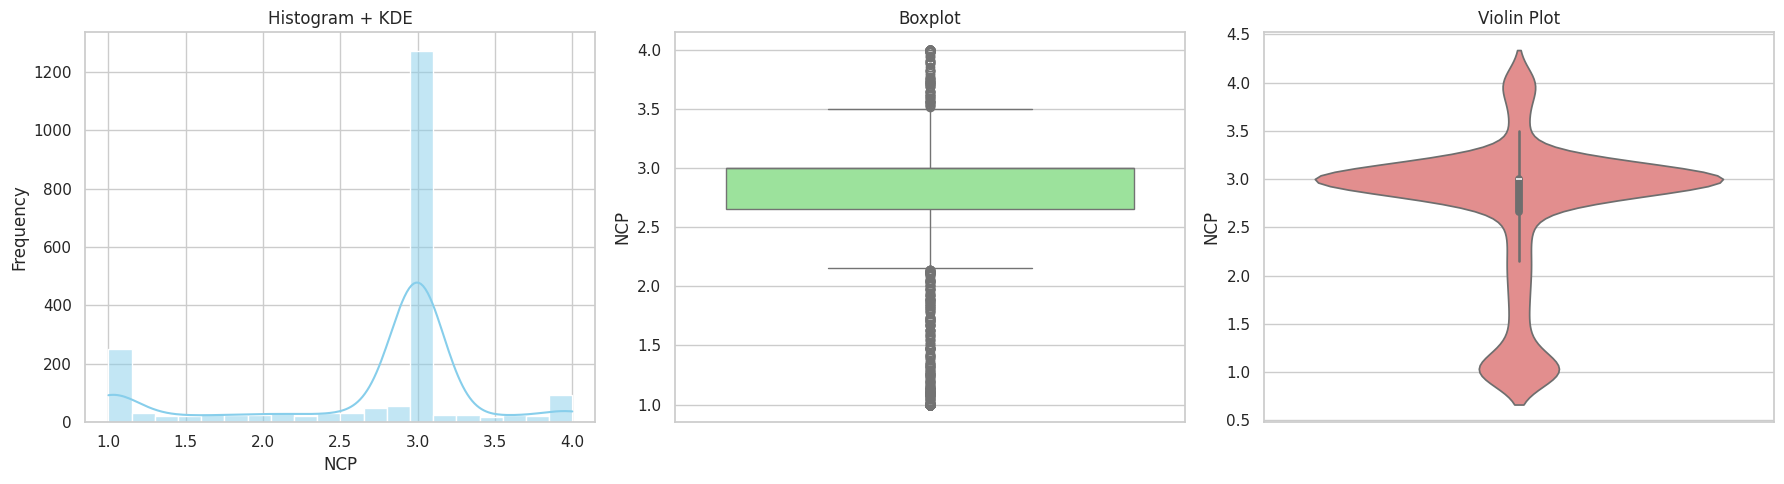

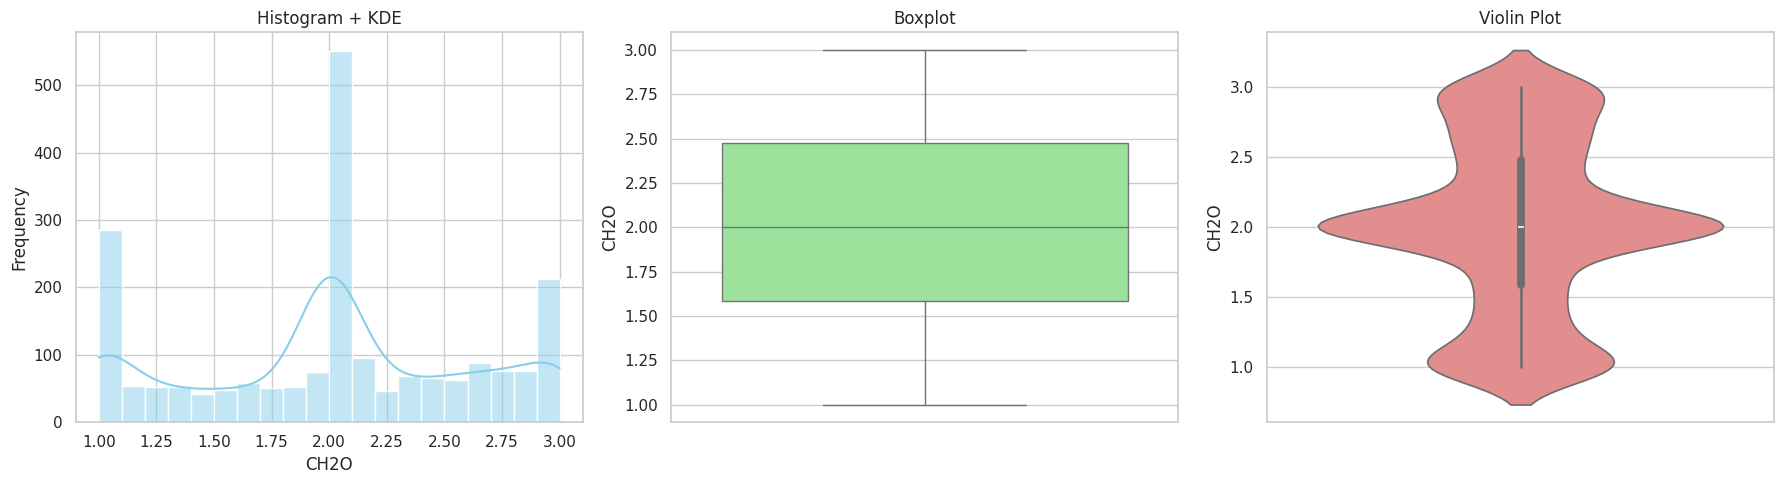

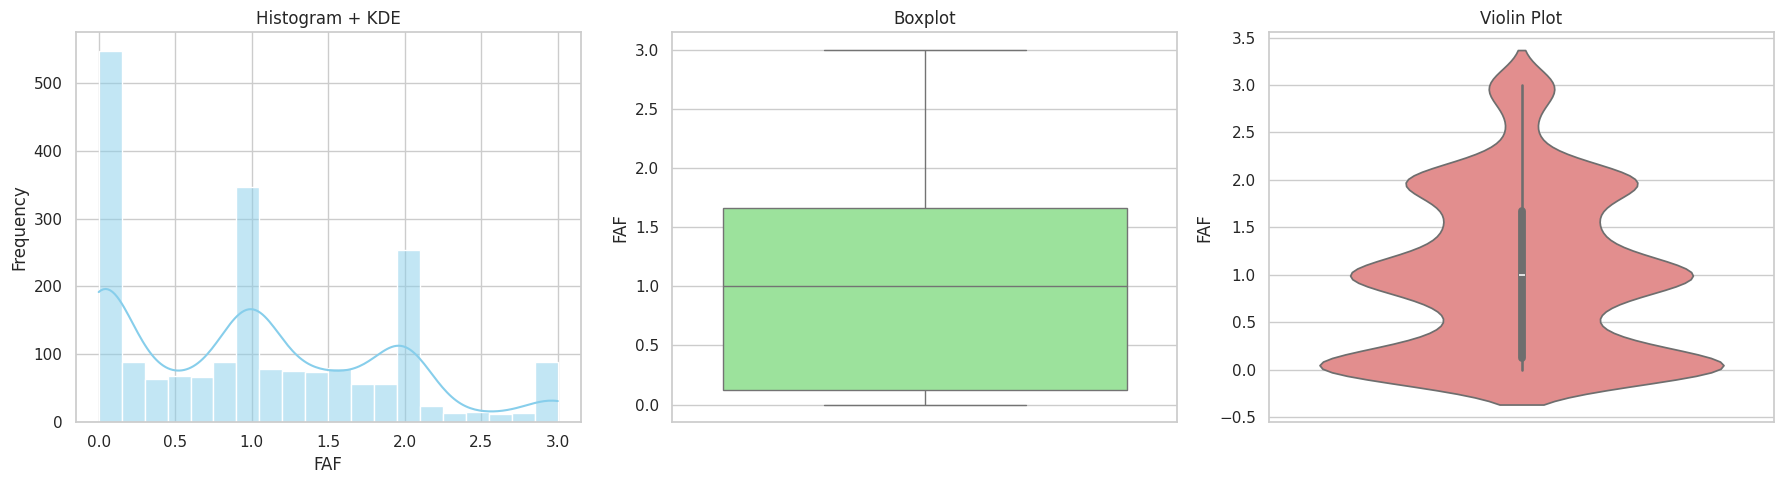

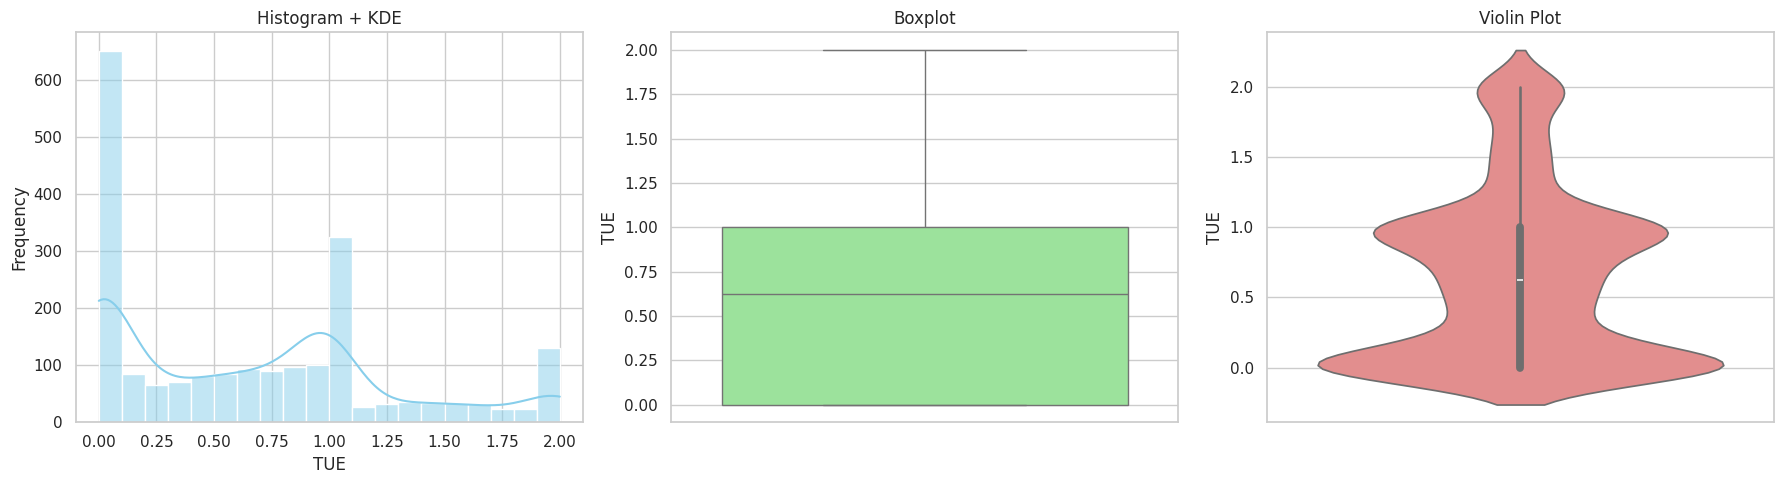

In [ ]:
# cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cols = df_num.columns

for col in cols:
  plot_diagram(col, df_num)

###**Categorical Distribution and Relationship with it's Target**

In [ ]:
# ----------------------------
# Categorical
# ----------------------------
def plot_diagram_cat (col, df):
  sns.set(style="whitegrid")

  fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 baris, 3 kolom

  # ------------------------------------------
  # 1Tentukan warna untuk tiap kategori
  # ------------------------------------------
  # Misal kolom kategorikal
  counts = df[col].value_counts()
  labels = counts.index
  sizes = counts.values

  colors = sns.color_palette("pastel", len(labels))  # atau custom list: ['skyblue','salmon',...]
  color_dict = dict(zip(labels, colors))

  # ------------------------------------------
  # Bar plot dengan warna sesuai
  # ------------------------------------------
  sns.countplot(x=col, data=df, ax=axes[0],
                palette=color_dict)

  axes[0].set_xlabel(col)
  axes[0].set_ylabel("Count")
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

  # ------------------------------------------
  # 3Pie chart dengan warna sama
  # ------------------------------------------
  explode = [0.01]*len(sizes)

  wedges, texts = axes[1].pie(
      sizes,
      labels=None,
      explode=explode,
      startangle=90,
      shadow=False,
      colors=[color_dict[label] for label in labels]  # warna sama seperti bar plot
  )

  # Legend di bawah
  leg = axes[1].legend(
      wedges,
      [f"{label} ({size/sum(sizes)*100:.1f}%)" for label, size in zip(labels, sizes)],
      title=col,
      loc='upper center',
      bbox_to_anchor=(0.5, -0.05),
      ncol=2,
      prop={'size': 9.5, 'weight':'normal'}
  )

  # Ubah warna teks legend menjadi hitam
  for text in leg.get_texts():
      text.set_color("black")

  axes[1].set_ylabel("")

  # -------------------------------------------------------------
  # Stacked bar / Count plot per target (Gender vs Obesity level)
  # -------------------------------------------------------------

  col_target = 'NObeyesdad'

  # Order obesity level
  order = [
      'Insufficient_Weight',
      'Normal_Weight',
      'Overweight_Level_I',
      'Overweight_Level_II',
      'Obesity_Type_I',
      'Obesity_Type_II',
      'Obesity_Type_III'
  ]

  # Warna berbeda untuk tiap kategori
  colors = ['lightblue','lightgreen','gold','orange','tomato','red','purple']

  # Buat crosstab dan atur kolom sesuai urutan
  crosstab = pd.crosstab(df[col], df[col_target])
  crosstab = crosstab[order]  # urutkan kolom sesuai list

  # Plot stacked bar
  crosstab.plot(kind='bar', stacked=True, ax=axes[2], color=colors)

  # axes[2].set_title("Stacked Bar - Gender vs Obesity Level")
  axes[2].set_xlabel(col)
  axes[2].set_ylabel("Count")
  axes[2].legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # legend di samping

  plt.tight_layout()
  plt.show()

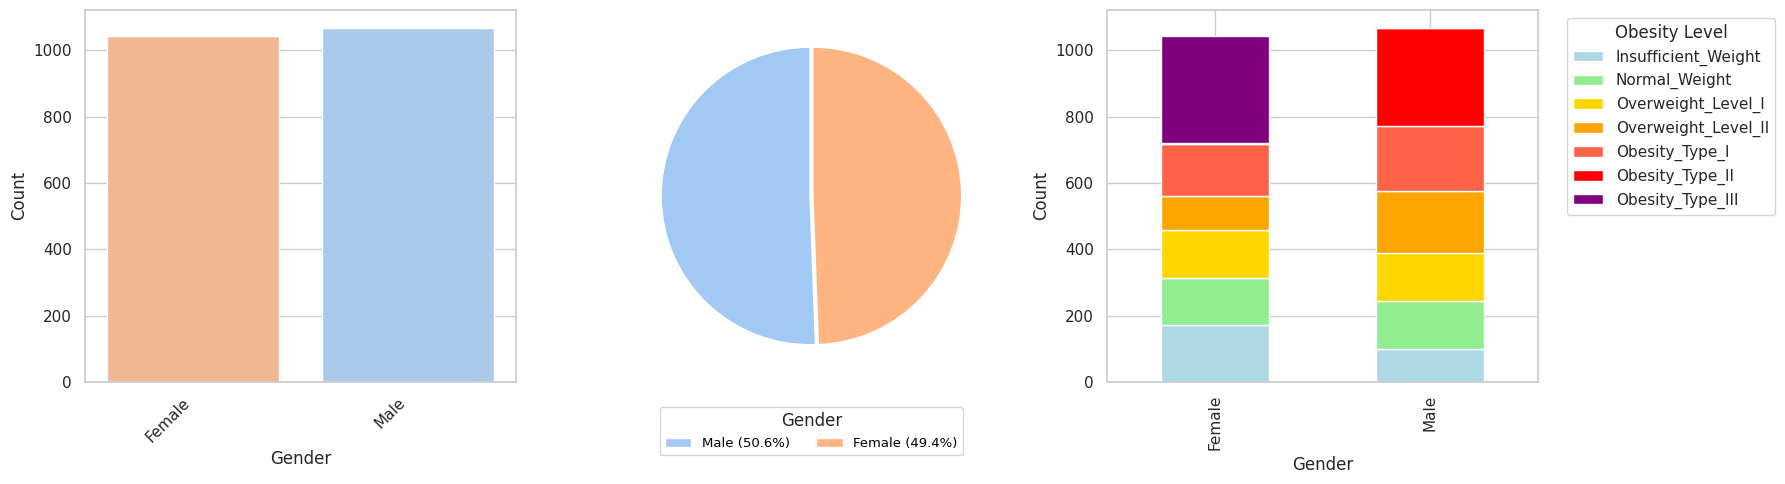

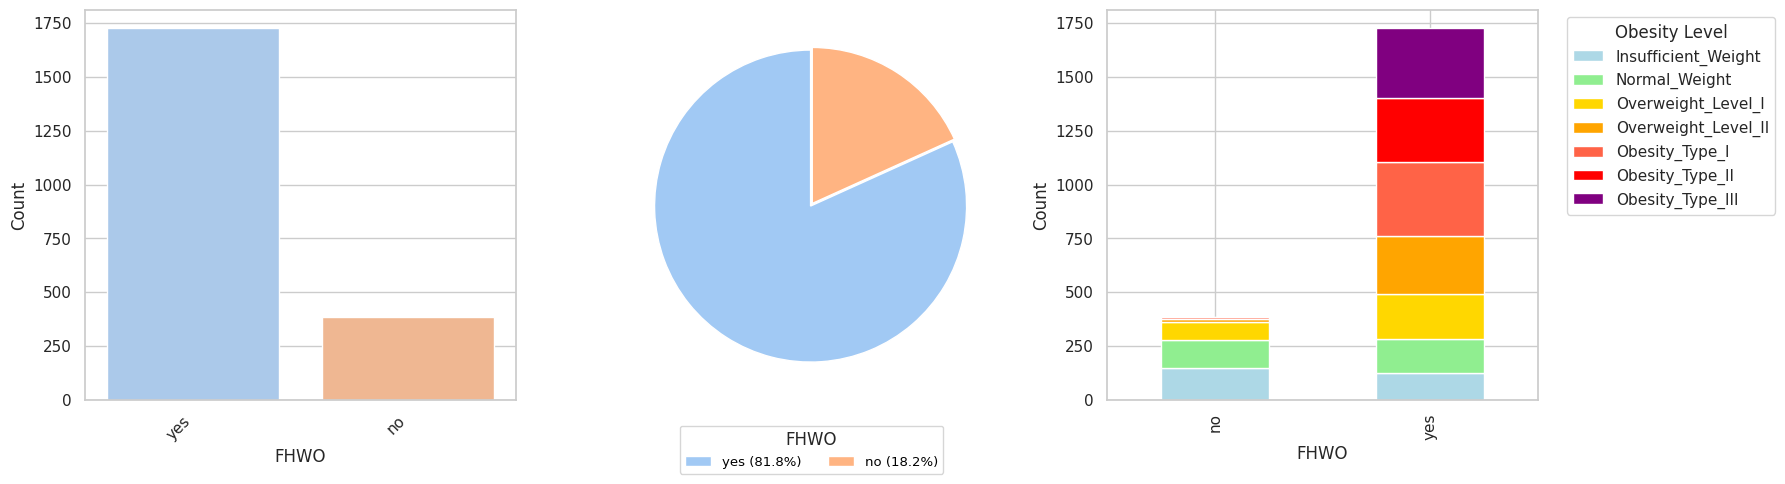

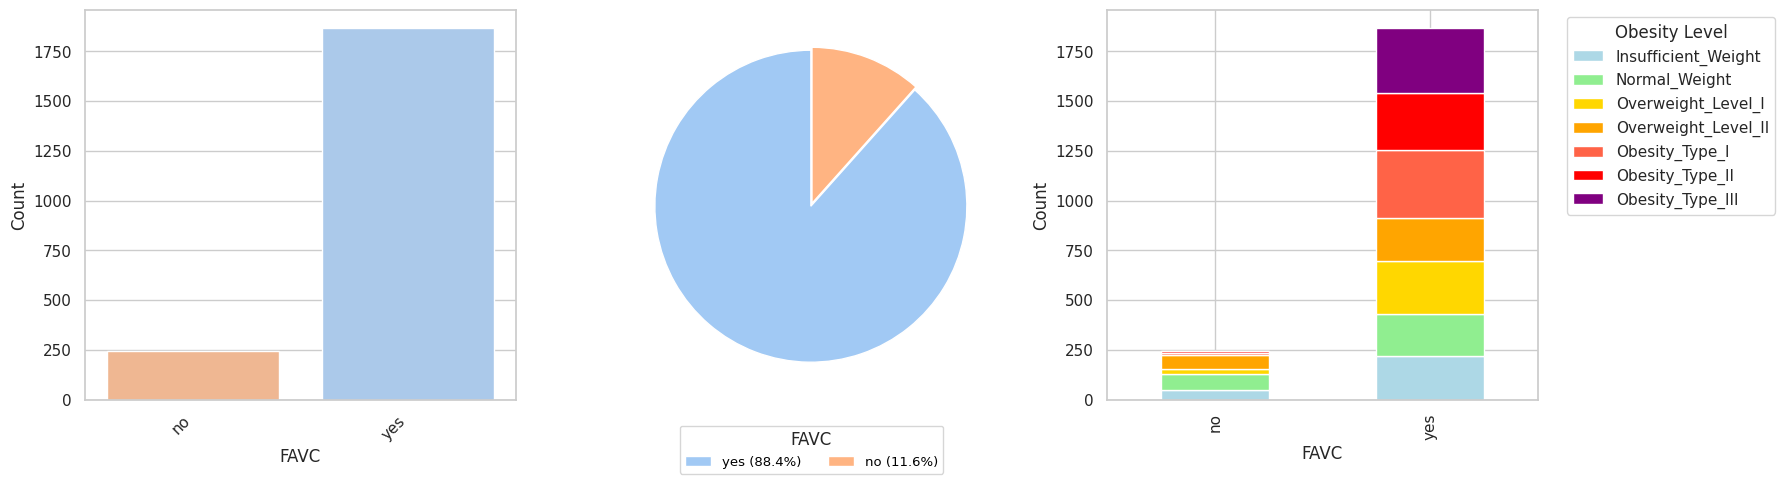

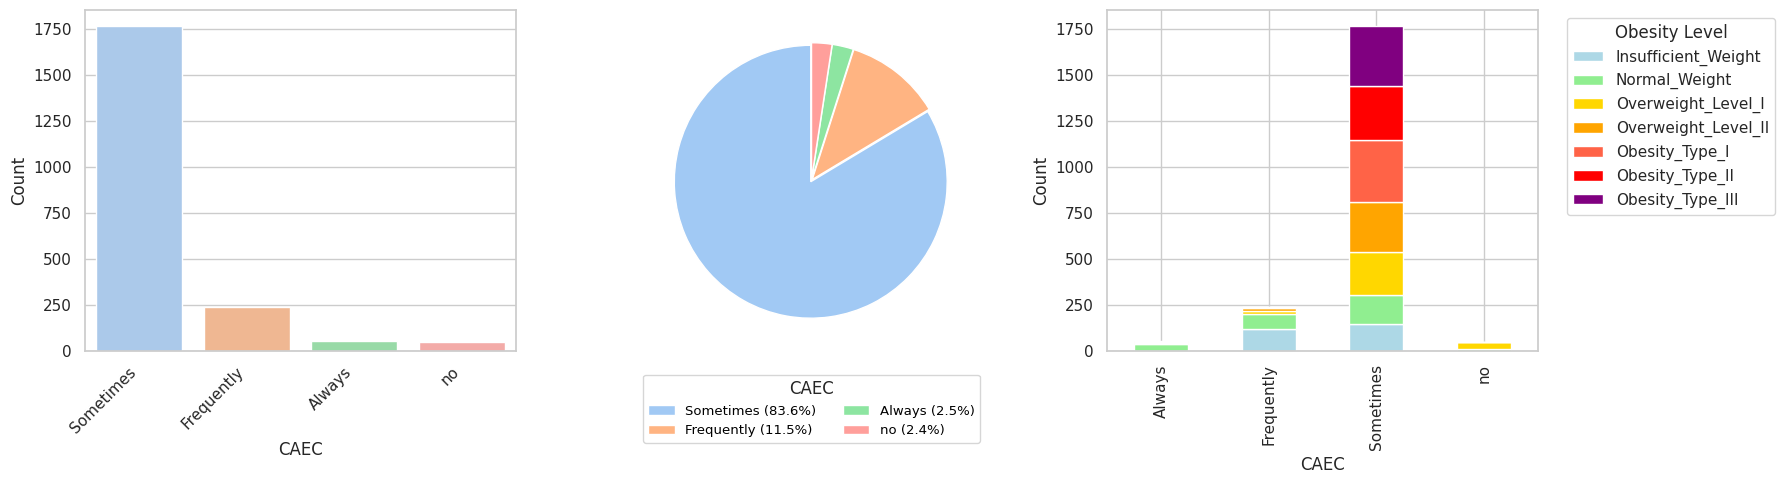

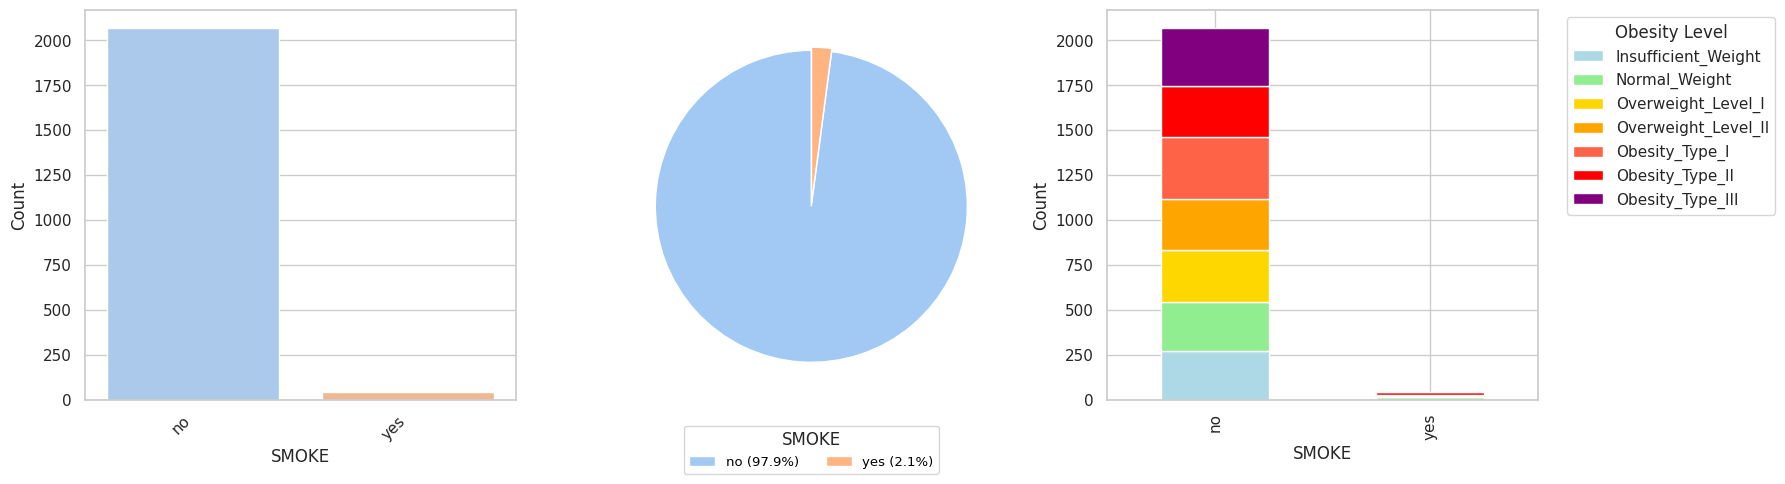

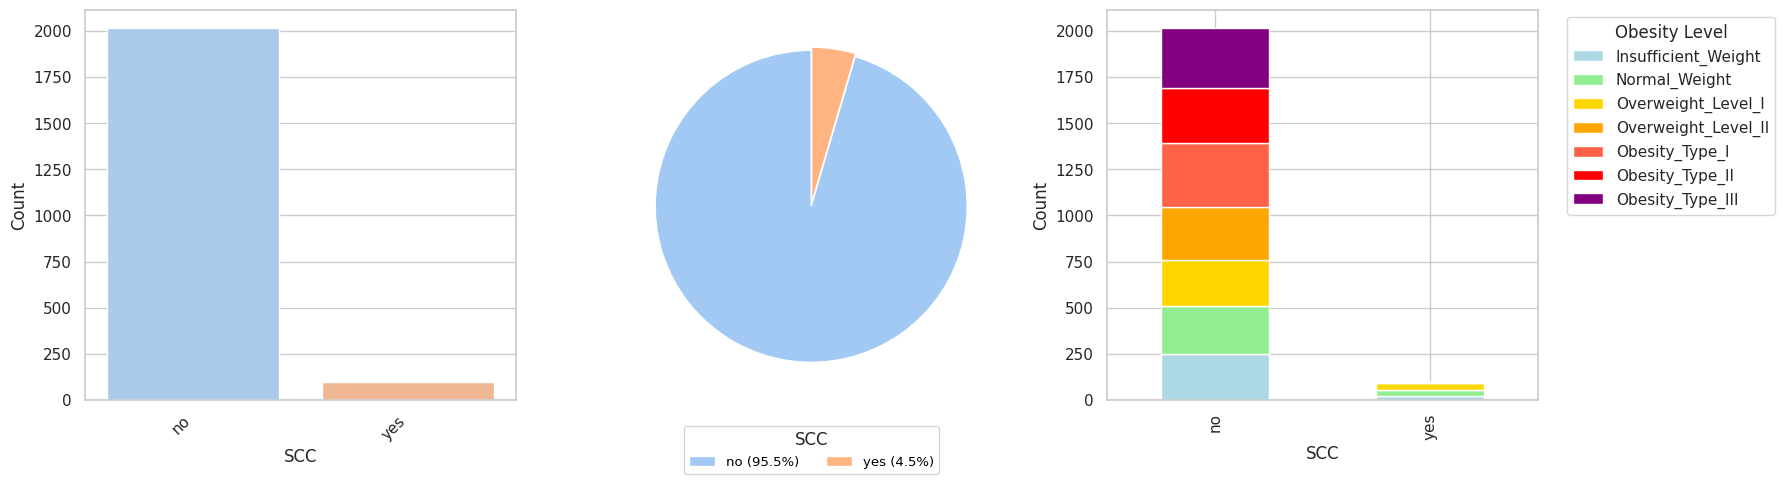

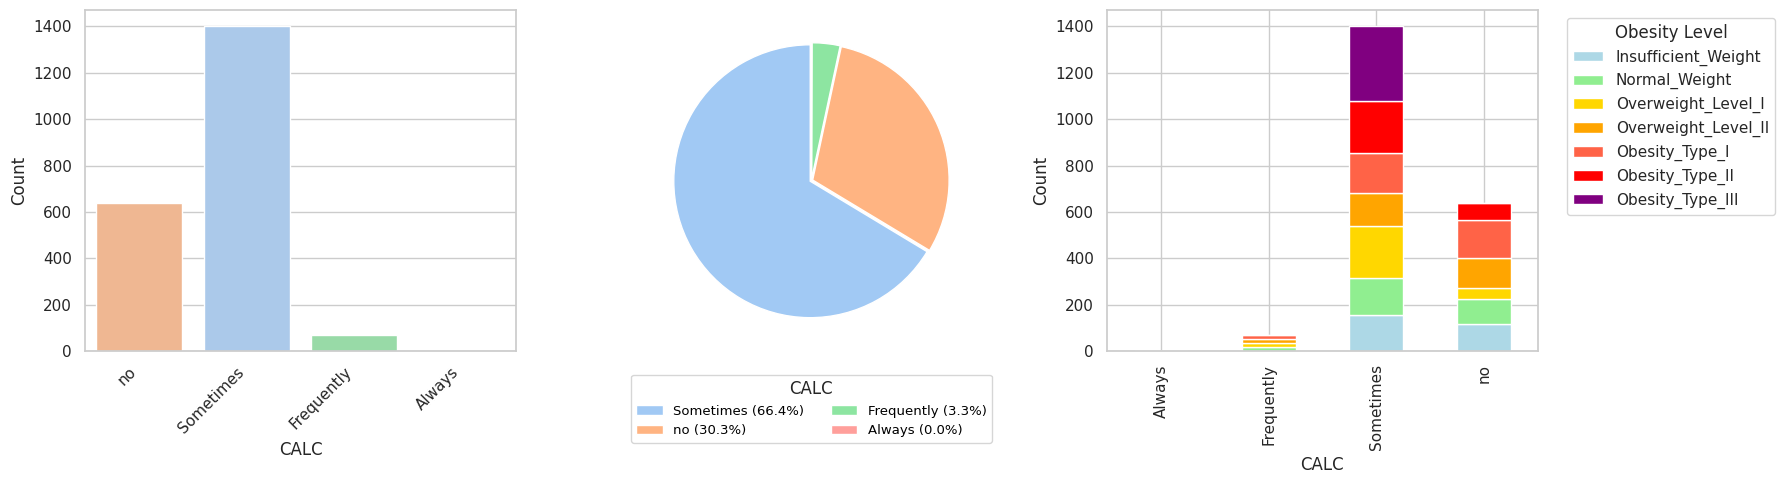

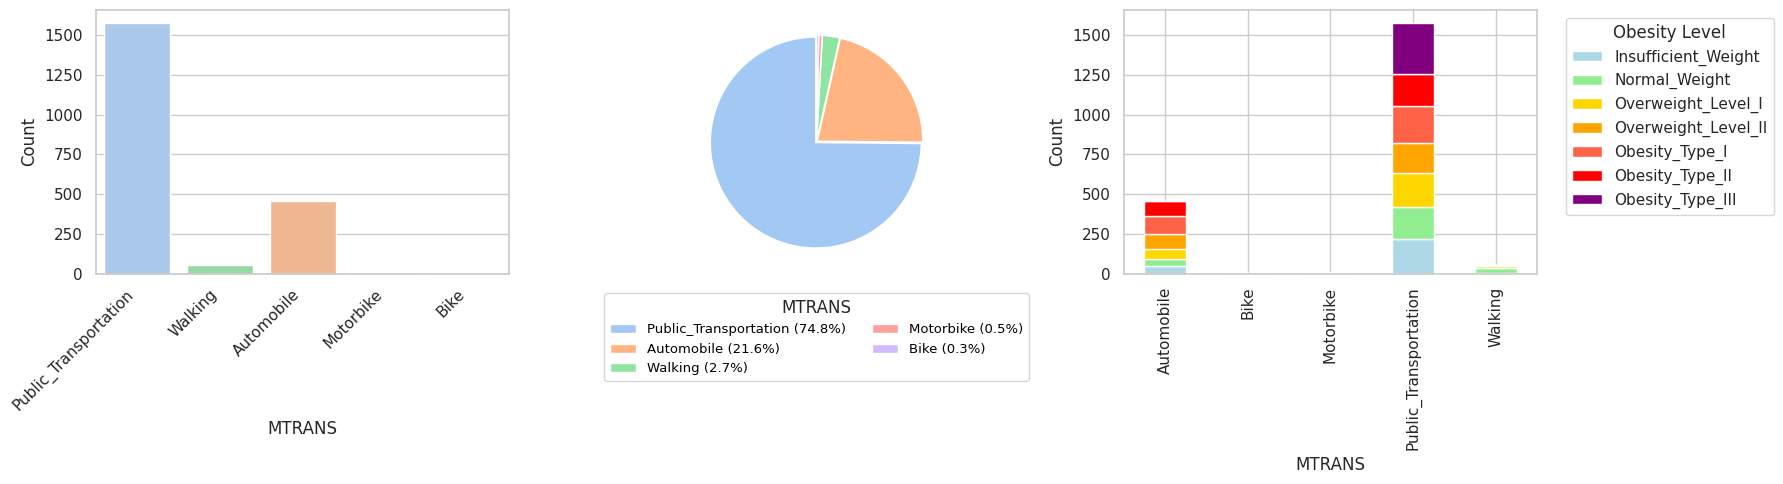

In [ ]:
# Plot diagram for all col_cat
cols_cat = [col for col in cols_cat if col != 'NObeyesdad']
for col in cols_cat:
  plot_diagram_cat(col, df)

### Bivariate Analysis (Categorical Features)

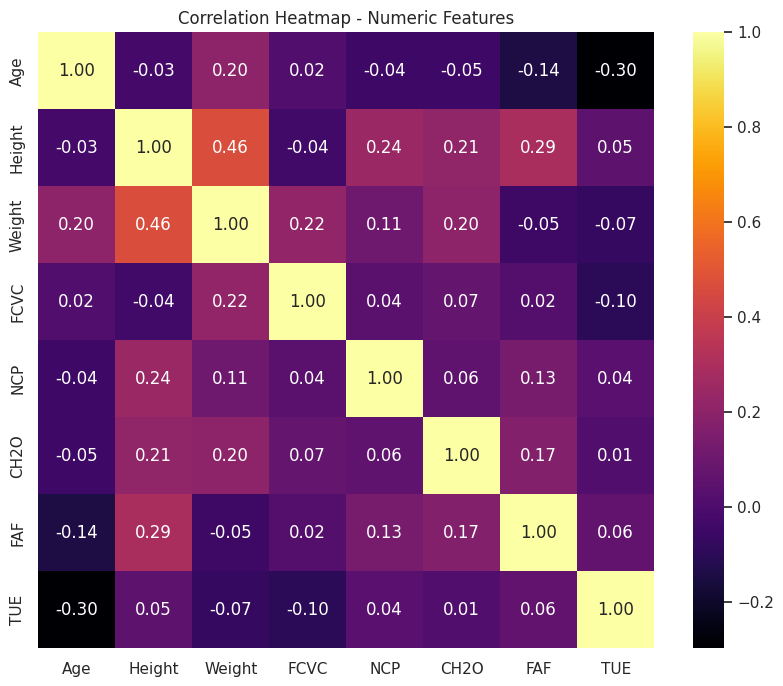

In [ ]:
# Pilih hanya kolom numerik
num_cols = df_num.columns

# Hitung correlation matrix
corr = df[num_cols].corr()

# Buat heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="inferno", cbar=True, square=True)
plt.title("Correlation Heatmap - Numeric Features")
plt.show()


Notes:
- There is no indication of multicollinearity.

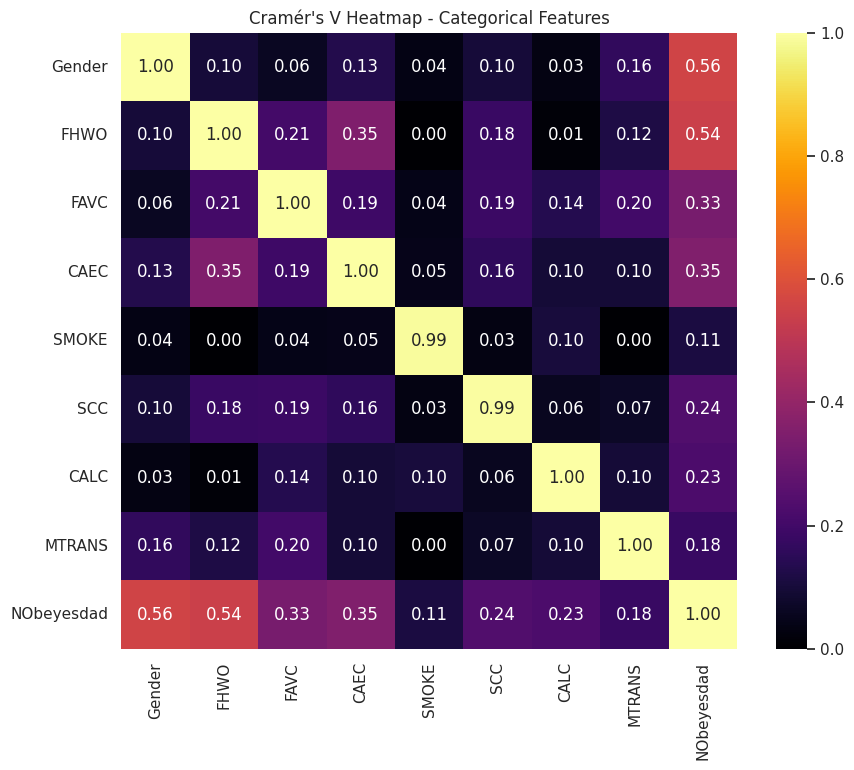

In [ ]:
from scipy.stats import chi2_contingency

# -----------------------------------------
# Heatmap Categorical Features (Cramér's V)
# -----------------------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # bias correction
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = df_cat.columns

# Matriks Cramér's V
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap="inferno", square=True)
plt.title("Cramér's V Heatmap - Categorical Features")
plt.show()


**Reference:**
Cramér’s V	| Relationship Category
------------|----------------------
0.00 – 0.20	| Independent / Very Weak → almost no association
0.21 – 0.50	| Moderate → moderate association
0.51 – 0.70	| Strong → fairly strong association
0.71 – 1.00	| Very Strong → very strong / nearly deterministic association

**Notes:**
- No multicollinearity

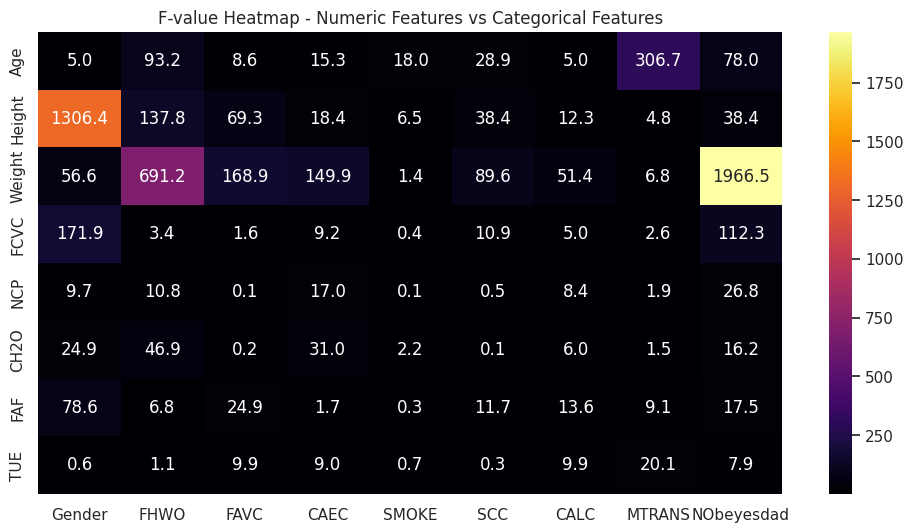

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik & kategorikal
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Matriks F-value
f_matrix = pd.DataFrame(index=numerical_cols, columns=categorical_cols)

for cat_col in categorical_cols:
    y = LabelEncoder().fit_transform(df[cat_col])  # encode target
    X = df[numerical_cols]
    f_vals, p_vals = f_classif(X, y)
    f_matrix[cat_col] = f_vals

f_matrix = f_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(f_matrix, annot=True, fmt=".1f", cmap="inferno", cbar=True)
plt.title("F-value Heatmap - Numeric Features vs Categorical Features")
plt.show()


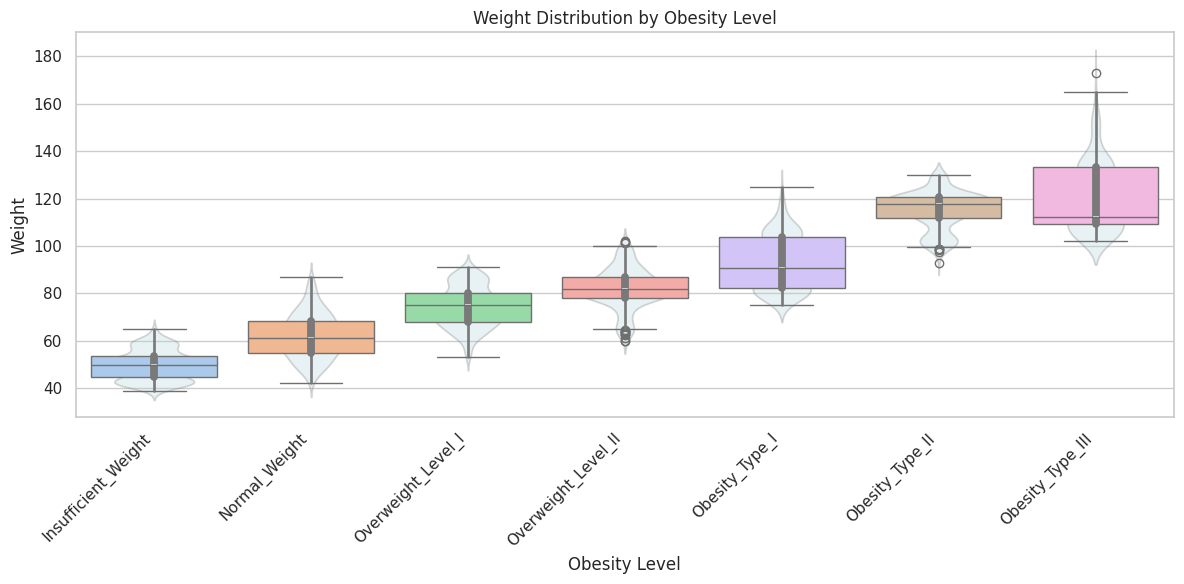

In [ ]:
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(x='NObeyesdad', y='Weight', data=df, order=[
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
], palette="pastel")

# Violin plot overlay
sns.violinplot(x='NObeyesdad', y='Weight', data=df, order=[
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
], color="lightblue", alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.title("Weight Distribution by Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Weight")
plt.tight_layout()
plt.show()


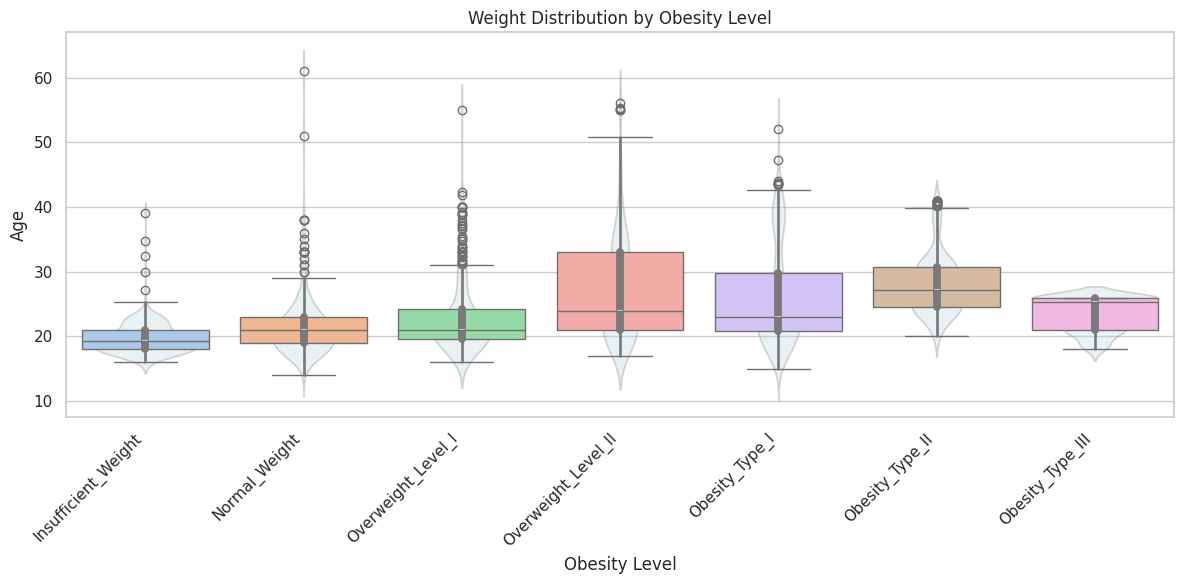

In [ ]:
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(x='NObeyesdad', y='Age', data=df, order=[
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
], palette="pastel")

# Violin plot overlay
sns.violinplot(x='NObeyesdad', y='Age', data=df, order=[
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
], color="lightblue", alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.title("Weight Distribution by Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

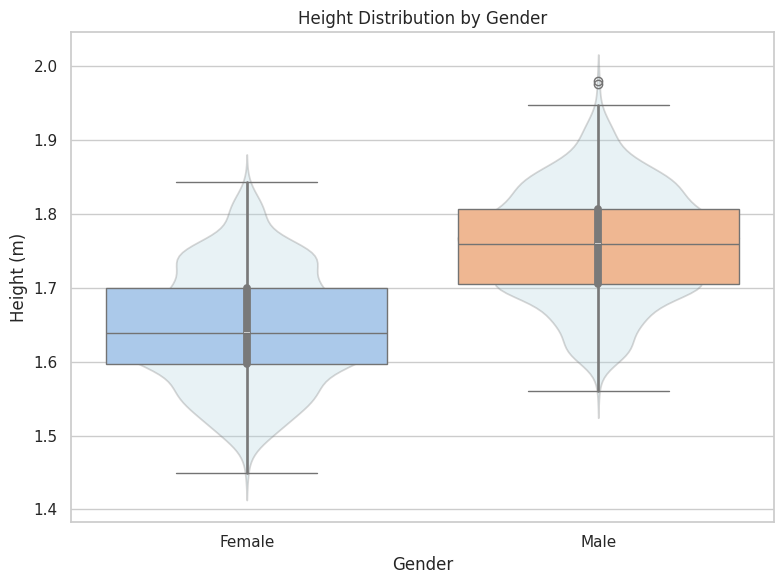

In [ ]:
plt.figure(figsize=(8,6))

# Boxplot
sns.boxplot(x='Gender', y='Height', data=df, palette="pastel")

# Violin plot overlay
sns.violinplot(x='Gender', y='Height', data=df, color="lightblue", alpha=0.3)

plt.title("Height Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Height (m)")
plt.tight_layout()
plt.show()


### Check Multicoliearity - VIF Score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_cols]

# Tambahkan constant (diperlukan untuk VIF)
X_const = add_constant(X)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# Hapus constant dari output
vif_data = vif_data[vif_data['Feature'] != 'const']

# Tambahkan rekomendasi
threshold = 5  # bisa ganti 5 atau 10
vif_data['Recommendation'] = vif_data['VIF'].apply(
    lambda x: 'Drop / Check' if x > threshold else 'OK'
)

# Tampilkan hasil
print(vif_data.sort_values(by='VIF', ascending=False))

  Feature       VIF Recommendation
2  Height  1.596997             OK
3  Weight  1.557109             OK
7     FAF  1.197080             OK
1     Age  1.173020             OK
8     TUE  1.110596             OK
4    FCVC  1.102184             OK
6    CH2O  1.089450             OK
5     NCP  1.071537             OK


All VIF < 5 → There is no multicollinearity.

# **Data Preprocessing**

- Handle missing value (isi/ drop) --> tidak ada, tidak ada juga perbaikan tipe data
- Encoding categorical data --> DONE
- Scaling / normalization
- Split train-test --> DONE
- Feature selection --> tidak ada

##Drop duplicate

In [ ]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

In [ ]:
# Make sure no duplicate data
df[df.duplicated()]

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [ ]:
# Data shape after dropping data duplicate
df.shape

(2087, 17)

##Data Splitting

- Split the dataset into training and testing sets using an 80:20 ratio.
- No separate validation set is applied here, as model validation will be performed using cross-validation.

In [ ]:
# Split data into train and test with proportio, 80:20
from sklearn.model_selection import train_test_split

X = df.drop(columns='NObeyesdad')
y = df[['NObeyesdad']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Data Train")
print(f"Total rows: {X_train.shape[0]}")
print("--------------------------")
print(X_train.head())
print(y_train.head())
print("==========================\n")
print("Data Test")
print(f"Total rows: {X_test.shape[0]}")
print("--------------------------")
print(X_test.head())
print(y_test.head())
print("==========================")

Data Train
Total rows: 1669
--------------------------
    Gender        Age    Height     Weight FHWO FAVC     FCVC       NCP  \
44    Male  21.000000  1.810000  80.000000   no   no  1.00000  3.000000   
691   Male  18.000000  1.786758  51.524444   no  yes  2.91548  3.000000   
667   Male  22.396504  1.869098  61.411141  yes  yes  3.00000  3.263201   
170   Male  22.000000  1.720000  82.000000   no  yes  2.00000  1.000000   
310   Male  17.000000  1.790000  57.000000  yes  yes  2.00000  4.000000   

           CAEC SMOKE      CH2O SCC       FAF       TUE       CALC  \
44           no    no  2.000000  no  2.000000  0.000000         no   
691   Sometimes    no  1.777486  no  1.077469  1.000000  Sometimes   
667   Sometimes    no  2.233274  no  1.557737  0.000355  Sometimes   
170   Sometimes    no  2.000000  no  2.000000  1.000000  Sometimes   
310  Frequently    no  2.000000  no  2.000000  1.000000         no   

                    MTRANS  
44   Public_Transportation  
691  Public_Tra

##Data Selection

###Check Correlation Heatmap

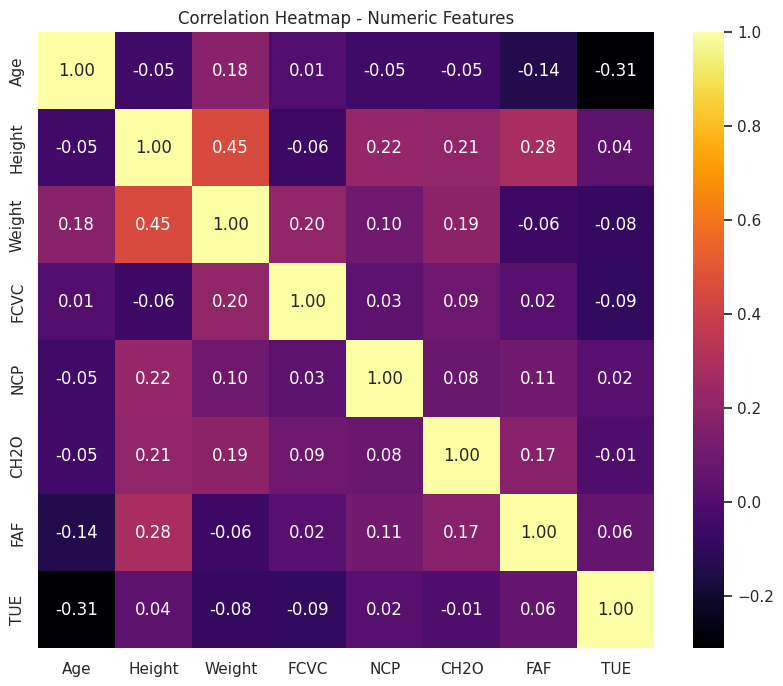

In [ ]:
# Pilih hanya kolom numerik
num_cols = df_num.columns

# Hitung correlation matrix: only for data train
corr = X_train[num_cols].corr()

# Buat heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="inferno", cbar=True, square=True)
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

###Check CIF Score

In [ ]:
# Pilih kolom numerik
numerical_cols = df_num.columns
X = X_train[numerical_cols]

# Tambahkan constant (diperlukan untuk VIF)
X_const = add_constant(X)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# Hapus constant dari output
vif_data = vif_data[vif_data['Feature'] != 'const']

# Tambahkan rekomendasi
threshold = 5  # bisa ganti 5 atau 10
vif_data['Recommendation'] = vif_data['VIF'].apply(
    lambda x: 'Drop / Check' if x > threshold else 'OK'
)

# Tampilkan hasil
print(vif_data.sort_values(by='VIF', ascending=False))

  Feature       VIF Recommendation
2  Height  1.566243             OK
3  Weight  1.517340             OK
7     FAF  1.189127             OK
1     Age  1.173902             OK
8     TUE  1.118859             OK
4    FCVC  1.104361             OK
6    CH2O  1.089531             OK
5     NCP  1.057054             OK


Notes:
- Following the train–test split, the absence of multicollinearity among numerical features remained consistent with the EDA results.

##Data Encoding

###Features Encoding

**Before encoding**

In [ ]:
X_train.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
44,Male,21.000000,1.810000,80.000000,no,no,1.00000,3.000000,no,no,2.000000,no,2.000000,0.000000,no,Public_Transportation
691,Male,18.000000,1.786758,51.524444,no,yes,2.91548,3.000000,Sometimes,no,1.777486,no,1.077469,1.000000,Sometimes,Public_Transportation
667,Male,22.396504,1.869098,61.411141,yes,yes,3.00000,3.263201,Sometimes,no,2.233274,no,1.557737,0.000355,Sometimes,Automobile
170,Male,22.000000,1.720000,82.000000,no,yes,2.00000,1.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
310,Male,17.000000,1.790000,57.000000,yes,yes,2.00000,4.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Public_Transportation


In [ ]:
# =====================================================
# Label Encoding untuk Binary Features: X_tran & X_test
# =====================================================
binary_cols = ['Gender', 'FHWO', 'FAVC', 'SMOKE', 'SCC']
le_binary = LabelEncoder()

for col in binary_cols:
    X_train[col] = le_binary.fit_transform(X_train[col])
    X_test[col] = le_binary.transform(X_test[col])

**After encoding**

In [ ]:
X_train.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
44,1,21.000000,1.810000,80.000000,0,0,1.00000,3.000000,no,0,2.000000,0,2.000000,0.000000,no,Public_Transportation
691,1,18.000000,1.786758,51.524444,0,1,2.91548,3.000000,Sometimes,0,1.777486,0,1.077469,1.000000,Sometimes,Public_Transportation
667,1,22.396504,1.869098,61.411141,1,1,3.00000,3.263201,Sometimes,0,2.233274,0,1.557737,0.000355,Sometimes,Automobile
170,1,22.000000,1.720000,82.000000,0,1,2.00000,1.000000,Sometimes,0,2.000000,0,2.000000,1.000000,Sometimes,Public_Transportation
310,1,17.000000,1.790000,57.000000,1,1,2.00000,4.000000,Frequently,0,2.000000,0,2.000000,1.000000,no,Public_Transportation


In [ ]:
X_test.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1337,0,18.603496,1.681719,90.671871,1,1,1.524428,3.0,Sometimes,0,1.383831,0,0.130417,1.000000,Sometimes,Public_Transportation
1763,1,31.199261,1.848845,125.077863,1,1,2.496190,3.0,Sometimes,1,1.662117,0,0.992371,0.217632,Sometimes,Public_Transportation
389,0,16.000000,1.610000,65.000000,1,1,1.000000,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,no,Public_Transportation
595,1,17.210933,1.819557,58.325122,1,1,2.559600,4.0,Sometimes,0,2.000000,0,2.000000,0.331483,no,Automobile
1735,1,26.734476,1.816197,119.622764,1,1,2.247037,3.0,Sometimes,0,2.718408,0,0.763595,0.000000,Sometimes,Public_Transportation


In [ ]:
# =====================================
# Ordinal Encoding untuk CAEC dan CALC
# =====================================
ordinal_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
for col in ['CAEC', 'CALC']:
    X_train[col] = X_train[col].map(ordinal_map)
    X_test[col] = X_test[col].map(ordinal_map)

**After encoding**

In [ ]:
X_train.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
44,1,21.000000,1.810000,80.000000,0,0,1.00000,3.000000,0,0,2.000000,0,2.000000,0.000000,0,Public_Transportation
691,1,18.000000,1.786758,51.524444,0,1,2.91548,3.000000,1,0,1.777486,0,1.077469,1.000000,1,Public_Transportation
667,1,22.396504,1.869098,61.411141,1,1,3.00000,3.263201,1,0,2.233274,0,1.557737,0.000355,1,Automobile
170,1,22.000000,1.720000,82.000000,0,1,2.00000,1.000000,1,0,2.000000,0,2.000000,1.000000,1,Public_Transportation
310,1,17.000000,1.790000,57.000000,1,1,2.00000,4.000000,2,0,2.000000,0,2.000000,1.000000,0,Public_Transportation


**Check values distribution**

In [ ]:
X_train['CAEC'].value_counts(dropna=False)

,count
CAEC,
1,1411
2,188
3,44
0,26


In [ ]:
X_test['CAEC'].value_counts(dropna=False)

,count
CAEC,
1,350
2,48
0,11
3,9


In [ ]:
# =====================================
# OneHotEncoding untuk Nominal Features
# =====================================
nominal_cols = ['MTRANS']

ohe = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
    ],
    remainder='passthrough'
)

# Fit-transform di TRAIN
X_train_encoded = ohe.fit_transform(X_train)

# Transform di TEST (tanpa fit ulang)
X_test_encoded = ohe.transform(X_test)

# Konversi ke DataFrame biar rapi
X_train_encoded = pd.DataFrame(
    X_train_encoded,
    columns=ohe.get_feature_names_out()
)
X_test_encoded = pd.DataFrame(
    X_test_encoded,
    columns=ohe.get_feature_names_out()
)

**After encoding**

In [ ]:
X_train_encoded.head()

,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Gender,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,0.0,1.0,0.0,1.0,21.000000,1.810000,80.000000,0.0,0.0,1.00000,3.000000,0.0,0.0,2.000000,0.0,2.000000,0.000000,0.0
1,0.0,0.0,1.0,0.0,1.0,18.000000,1.786758,51.524444,0.0,1.0,2.91548,3.000000,1.0,0.0,1.777486,0.0,1.077469,1.000000,1.0
2,0.0,0.0,0.0,0.0,1.0,22.396504,1.869098,61.411141,1.0,1.0,3.00000,3.263201,1.0,0.0,2.233274,0.0,1.557737,0.000355,1.0
3,0.0,0.0,1.0,0.0,1.0,22.000000,1.720000,82.000000,0.0,1.0,2.00000,1.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,1.0
4,0.0,0.0,1.0,0.0,1.0,17.000000,1.790000,57.000000,1.0,1.0,2.00000,4.000000,2.0,0.0,2.000000,0.0,2.000000,1.000000,0.0


In [ ]:
X_test_encoded.head()

,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Gender,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,0.0,1.0,0.0,0.0,18.603496,1.681719,90.671871,1.0,1.0,1.524428,3.0,1.0,0.0,1.383831,0.0,0.130417,1.000000,1.0
1,0.0,0.0,1.0,0.0,1.0,31.199261,1.848845,125.077863,1.0,1.0,2.496190,3.0,1.0,1.0,1.662117,0.0,0.992371,0.217632,1.0
2,0.0,0.0,1.0,0.0,0.0,16.000000,1.610000,65.000000,1.0,1.0,1.000000,1.0,1.0,0.0,2.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,1.0,17.210933,1.819557,58.325122,1.0,1.0,2.559600,4.0,1.0,0.0,2.000000,0.0,2.000000,0.331483,0.0
4,0.0,0.0,1.0,0.0,1.0,26.734476,1.816197,119.622764,1.0,1.0,2.247037,3.0,1.0,0.0,2.718408,0.0,0.763595,0.000000,1.0


###Target Encoding

**Before encoding**

In [ ]:
y_train.head()

,NObeyesdad
44,Normal_Weight
691,Insufficient_Weight
667,Insufficient_Weight
170,Overweight_Level_II
310,Insufficient_Weight


In [ ]:
# ============================================
# Encode Target (Ordinal)
# ============================================
obesity_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

y_train = y_train['NObeyesdad'].apply(lambda x: obesity_order.index(x))
y_test = y_test['NObeyesdad'].apply(lambda x: obesity_order.index(x))

In [ ]:
y_train.head()

,NObeyesdad
44,1
691,0
667,0
170,3
310,0


In [ ]:
y_test.head()

,NObeyesdad
1337,4
1763,5
389,2
595,0
1735,5


In [ ]:
# ============================================
# Cek hasil
# ============================================
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_encoded shape: (1669, 19)
X_test_encoded shape: (418, 19)
y_train shape: (1669,)
y_test shape: (418,)


##Data Scaling

**Check data before scaling**

In [ ]:
X_train_encoded.head()

,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Gender,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,0.0,1.0,0.0,1.0,21.000000,1.810000,80.000000,0.0,0.0,1.00000,3.000000,0.0,0.0,2.000000,0.0,2.000000,0.000000,0.0
1,0.0,0.0,1.0,0.0,1.0,18.000000,1.786758,51.524444,0.0,1.0,2.91548,3.000000,1.0,0.0,1.777486,0.0,1.077469,1.000000,1.0
2,0.0,0.0,0.0,0.0,1.0,22.396504,1.869098,61.411141,1.0,1.0,3.00000,3.263201,1.0,0.0,2.233274,0.0,1.557737,0.000355,1.0
3,0.0,0.0,1.0,0.0,1.0,22.000000,1.720000,82.000000,0.0,1.0,2.00000,1.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,1.0
4,0.0,0.0,1.0,0.0,1.0,17.000000,1.790000,57.000000,1.0,1.0,2.00000,4.000000,2.0,0.0,2.000000,0.0,2.000000,1.000000,0.0


In [ ]:
X_test_encoded.head()

,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Gender,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,0.0,1.0,0.0,0.0,18.603496,1.681719,90.671871,1.0,1.0,1.524428,3.0,1.0,0.0,1.383831,0.0,0.130417,1.000000,1.0
1,0.0,0.0,1.0,0.0,1.0,31.199261,1.848845,125.077863,1.0,1.0,2.496190,3.0,1.0,1.0,1.662117,0.0,0.992371,0.217632,1.0
2,0.0,0.0,1.0,0.0,0.0,16.000000,1.610000,65.000000,1.0,1.0,1.000000,1.0,1.0,0.0,2.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,1.0,17.210933,1.819557,58.325122,1.0,1.0,2.559600,4.0,1.0,0.0,2.000000,0.0,2.000000,0.331483,0.0
4,0.0,0.0,1.0,0.0,1.0,26.734476,1.816197,119.622764,1.0,1.0,2.247037,3.0,1.0,0.0,2.718408,0.0,0.763595,0.000000,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit hanya di training data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Apply scaling ke test data
X_test_scaled = scaler.transform(X_test_encoded)


**Check data after scaling --> array NO dataframe**

In [ ]:
X_train_scaled

array([[-0.05481613, -0.06940011,  0.57988707, ...,  1.15273428,
        -1.09030512, -1.42960449],
       [-0.05481613, -0.06940011,  0.57988707, ...,  0.06763666,
         0.56104507,  0.51024095],
       [-0.05481613, -0.06940011, -1.72447369, ...,  0.63253655,
        -1.08971889,  0.51024095],
       ...,
       [-0.05481613, -0.06940011,  0.57988707, ..., -1.19970183,
         1.1650974 ,  0.51024095],
       [-0.05481613, -0.06940011,  0.57988707, ...,  1.65841747,
         2.17613655, -1.42960449],
       [-0.05481613, -0.06940011,  0.57988707, ..., -0.98918703,
        -0.81605549,  0.51024095]])

In [ ]:
X_test_scaled

array([[-0.05481613, -0.06940011,  0.57988707, ..., -1.046303  ,
         0.56104507,  0.51024095],
       [-0.05481613, -0.06940011,  0.57988707, ..., -0.03245714,
        -0.73091848,  0.51024095],
       [-0.05481613, -0.06940011,  0.57988707, ..., -1.19970183,
        -1.09030512, -1.42960449],
       ...,
       [-0.05481613, -0.06940011,  0.57988707, ...,  0.36646309,
        -1.00287934,  0.51024095],
       [-0.05481613, -0.06940011, -1.72447369, ...,  0.76336023,
        -1.09030512, -1.42960449],
       [-0.05481613, -0.06940011, -1.72447369, ...,  1.15273428,
        -1.09030512, -1.42960449]])

**Corr Matrix after scaling --> convert first data in array to df**

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_train_scaled_df

,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Gender,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,-0.054816,-0.0694,0.579887,-0.16262,0.981595,-0.527480,1.147924,-0.274109,-2.171579,-2.749359,-2.697482,0.404840,-2.501698,-0.139814,-0.013481,-0.224379,1.152734,-1.090305,-1.429604
1,-0.054816,-0.0694,0.579887,-0.16262,0.981595,-0.996823,0.896895,-1.365851,-2.171579,0.363721,0.906960,0.404840,-0.325912,-0.139814,-0.382363,-0.224379,0.067637,0.561045,0.510241
2,-0.054816,-0.0694,-1.724474,-0.16262,0.981595,-0.309000,1.786224,-0.986799,0.460495,0.363721,1.066005,0.748825,-0.325912,-0.139814,0.373239,-0.224379,0.632537,-1.089719,0.510241
3,-0.054816,-0.0694,0.579887,-0.16262,0.981595,-0.371032,0.175861,-0.197429,-2.171579,0.363721,-0.815738,-2.209011,-0.325912,-0.139814,-0.013481,-0.224379,1.152734,0.561045,0.510241
4,-0.054816,-0.0694,0.579887,-0.16262,0.981595,-1.153270,0.931910,-1.155920,0.460495,0.363721,-0.815738,1.711766,1.849875,-0.139814,-0.013481,-0.224379,1.152734,0.561045,-1.429604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,-0.054816,-0.0694,0.579887,-0.16262,0.981595,-0.201503,1.564324,1.313962,0.460495,0.363721,1.066005,-0.160318,-0.325912,-0.139814,0.004793,-0.224379,-0.121724,-1.090305,0.510241
1665,-0.054816,-0.0694,-1.724474,-0.16262,-1.018750,1.734176,-0.560617,-0.295658,0.460495,0.363721,-0.522064,0.286063,-0.325912,-0.139814,-1.304436,-0.224379,-0.607736,1.875744,-1.429604
1666,-0.054816,-0.0694,0.579887,-0.16262,0.981595,-0.232958,0.969184,0.105809,0.460495,0.363721,-1.005576,-0.411954,-0.325912,-0.139814,-1.010577,-0.224379,-1.199702,1.165097,0.510241
1667,-0.054816,-0.0694,0.579887,-0.16262,0.981595,-0.177460,0.618776,0.409462,0.460495,0.363721,-0.815738,0.404840,-0.325912,-0.139814,1.625697,-0.224379,1.658417,2.176137,-1.429604


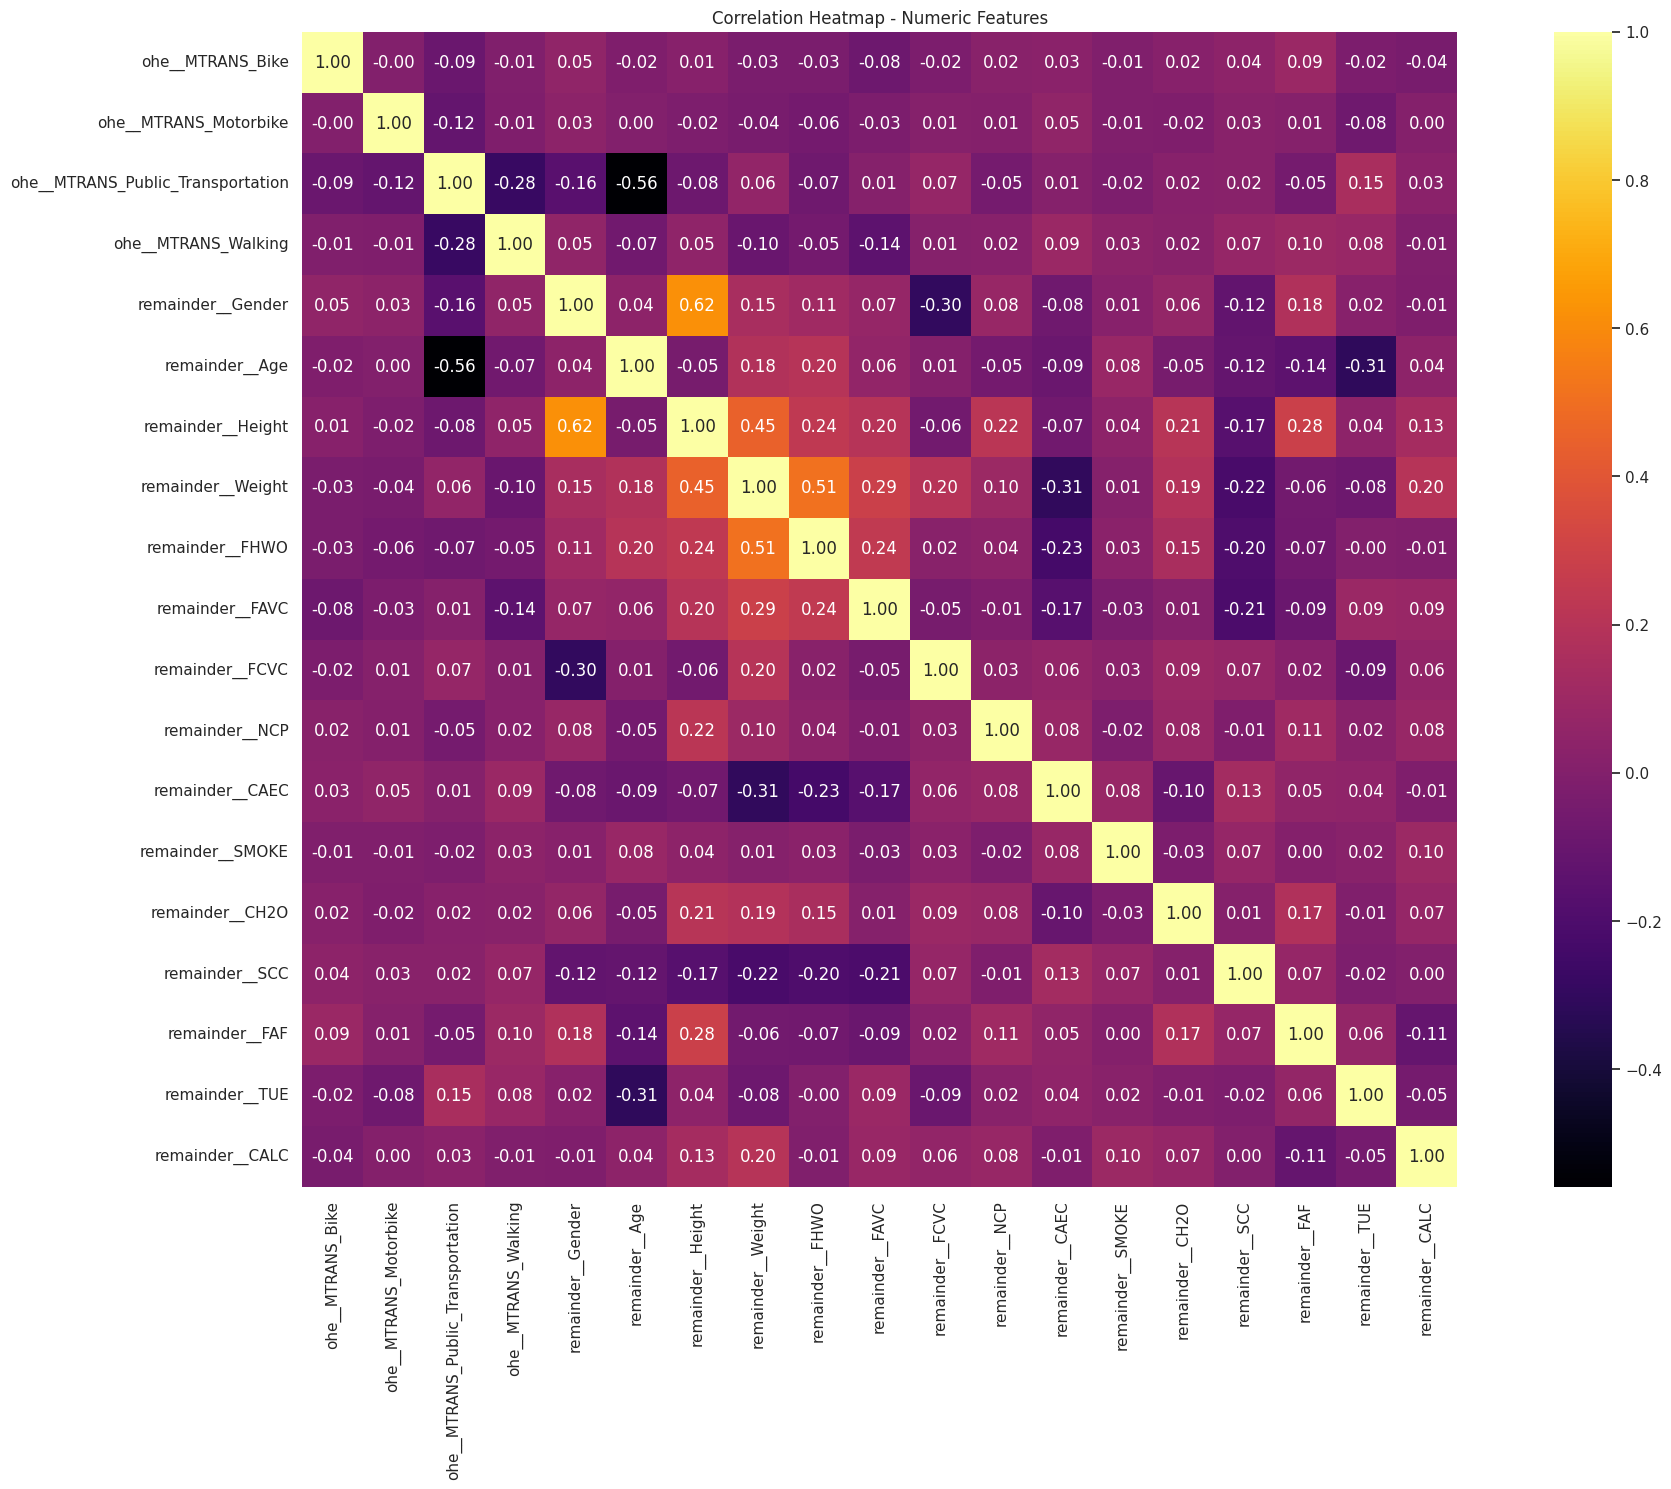

In [ ]:
# Apply to all columns
num_cols = X_train_scaled_df.columns

# Hitung correlation matrix
corr = X_train_scaled_df[num_cols].corr()

# Buat heatmap
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="inferno", cbar=True, square=True)
plt.title("Correlation Heatmap - Numeric Features")

# plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")

plt.show()

**VIF Score after scaling**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Pilih kolom numerik
#numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = X_train_scaled_df

# Tambahkan constant (diperlukan untuk VIF)
X_const = add_constant(X) # intercept

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# Hapus constant dari output
vif_data = vif_data[vif_data['Feature'] != 'const']

# Tambahkan rekomendasi
threshold = 5  # bisa ganti 5 atau 10
vif_data['Recommendation'] = vif_data['VIF'].apply(
    lambda x: 'Drop / Check' if x > threshold else 'OK'
)

# Tampilkan hasil
print(vif_data.sort_values(by='VIF', ascending=False))

                              Feature       VIF Recommendation
7                   remainder__Height  2.634470             OK
8                   remainder__Weight  2.234111             OK
6                      remainder__Age  2.032865             OK
3   ohe__MTRANS_Public_Transportation  2.003263             OK
5                   remainder__Gender  1.946147             OK
9                     remainder__FHWO  1.465629             OK
17                     remainder__FAF  1.241384             OK
11                    remainder__FCVC  1.240577             OK
4                 ohe__MTRANS_Walking  1.232205             OK
10                    remainder__FAVC  1.206706             OK
13                    remainder__CAEC  1.190076             OK
18                     remainder__TUE  1.161830             OK
16                     remainder__SCC  1.129237             OK
19                    remainder__CALC  1.116707             OK
15                    remainder__CH2O  1.116496        

# **Baseline Modeling**

Models will be applied ini this project.
Role | Type | Model | Scaling | Characteristics
-----|------|-------|---------|----------------
Baseline | Linear | Logistic Regression (multinomial mode) | Standard | Fast, stable, but does not take the order of categories into account.
Candidate | Linear | Ordinal Logistic Regression <br> (Proportional Odds Model) | Standard | (1) The most classic and interpretable. (2) Suitable if the data is measurable <br> and we want to know the most significant factors affecting obesity levels.
Candidate | Tree-based | Random Forest Classifier | no need | (1) Robust and non-linear, can capture feature interactions. (2) Suitable if <br> the relationship between features and obesity is complex.
Candidate | Tree-based | Gradient Boosting <br> (XGBoost / LightGBM / CatBoost) | no need | (1) Typically has the strongest performance. (2) CatBoostClassifier can even <br> automatically handle categorical data. (3) Can be tuned for ordinal <br> output with a custom strategy (e.g., using an ordinal loss function)..


#### Multinomial Logistic Regression

Multinomial Logistic Regression adalah perluasan (generalization) dari binary logistic regression yang digunakan ketika variabel target memiliki lebih dari dua kelas yang tidak berurutan (non-ordinal).

✅ Test Accuracy: 0.8684

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.8750    0.9492    0.9106        59
           1     0.8723    0.6721    0.7593        61
           2     0.7018    0.7273    0.7143        55
           3     0.6964    0.7959    0.7429        49
           4     0.9265    0.9000    0.9130        70
           5     0.9697    1.0000    0.9846        64
           6     1.0000    1.0000    1.0000        60

    accuracy                         0.8684       418
   macro avg     0.8631    0.8635    0.8607       418
weighted avg     0.8719    0.8684    0.8676       418



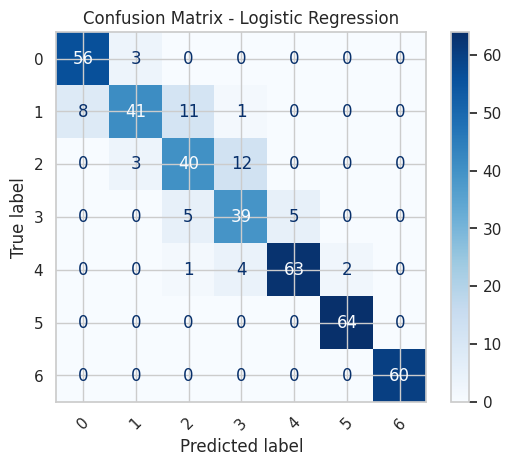

📈 Cross-validation accuracy: 0.8610 ± 0.0160

🔍 Top 10 Most Important Features:
                              Feature  Coefficient
7                   remainder__Weight     6.205324
6                   remainder__Height     1.641516
4                   remainder__Gender     0.862415
10                    remainder__FCVC     0.569027
5                      remainder__Age     0.484959
8                     remainder__FHWO     0.397414
9                     remainder__FAVC     0.339960
11                     remainder__NCP     0.299044
18                    remainder__CALC     0.269359
2   ohe__MTRANS_Public_Transportation     0.263627


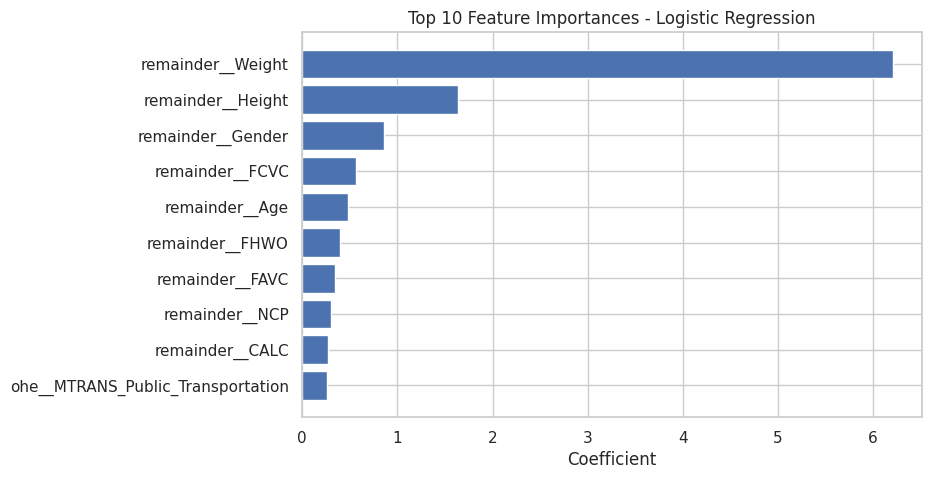

✅ Process completed in 1.2 seconds


In [ ]:
start_time = time.time()
# ================================================
#  1. Import Library
# ================================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

# ================================================
#  2. Data Input
# ================================================
# Ubah data ke series
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
#  3. Inisialisasi Model
# ================================================
logreg = LogisticRegression(
    multi_class='multinomial',  # karena target-nya multi-class (bukan binary)
    solver='lbfgs',             # solver stabil untuk dataset dengan ukuran menengah
    max_iter=1000,              # iterasi lebih tinggi agar konvergen
    random_state=42
)

# ================================================
#  4. Training Model: X Train scaled
# ================================================
logreg.fit(X_train_scaled, y_train)

# ================================================
#  5. Evaluasi pada Data Test: Scaled > Regression
# ================================================
y_pred = logreg.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}\n")

# Classification report (precision, recall, F1 per kelas)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ================================================
#  6. Cross Validation (Opsional)
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
#  7. Interpretasi Koefisien (Opsional)
# ================================================
coefficients = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coefficient': np.mean(np.abs(logreg.coef_), axis=0)
}).sort_values(by='Coefficient', ascending=False)

print("\n🔍 Top 10 Most Important Features:")
print(coefficients.head(10))

# Visualisasi Feature Importance
plt.figure(figsize=(8,5))
plt.barh(coefficients['Feature'].head(10), coefficients['Coefficient'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Logistic Regression')
plt.xlabel('Coefficient')
plt.show()

end_time = time.time()
print(f"✅ Process completed in {end_time - start_time:.1f} seconds")


####Ordinal Logistic Regression

In [ ]:
!pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=ac3cf45ba258b65c4794beacad9ed4006ad1b14406373e54e7b9c19c442e10e1
  Stored in directory: /root/.cache/pip/wheels/80/3e/3b/13f1adf346cad0fec675db328e4b0d814795c6c8e2fb659122
Successfully built mord


✅ Test Accuracy (Ordinal Logistic Regression): 0.9091

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.8947    0.8644    0.8793        59
           1     0.8548    0.8689    0.8618        61
           2     0.8889    0.8727    0.8807        55
           3     0.8824    0.9184    0.9000        49
           4     1.0000    0.9857    0.9928        70
           5     0.9206    0.9062    0.9134        64
           6     0.9032    0.9333    0.9180        60

    accuracy                         0.9091       418
   macro avg     0.9064    0.9071    0.9066       418
weighted avg     0.9095    0.9091    0.9091       418



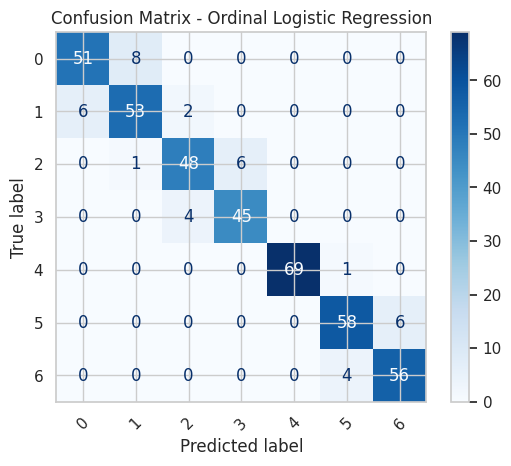

📈 Cross-validation accuracy: 0.8993 ± 0.0096

🔍 Top 10 Most Important Features (positive → higher obesity level):
                              Feature  Coefficient
7                   remainder__Weight    15.007698
2   ohe__MTRANS_Public_Transportation     0.473873
8                     remainder__FHWO     0.354951
5                      remainder__Age     0.272506
10                    remainder__FCVC     0.164632
11                     remainder__NCP     0.160229
0                    ohe__MTRANS_Bike     0.110007
3                 ohe__MTRANS_Walking     0.082495
1               ohe__MTRANS_Motorbike     0.049364
9                     remainder__FAVC     0.047849

🔍 Least 10 Most Important Features (negative → lower obesity level):
              Feature  Coefficient
9     remainder__FAVC     0.047849
17     remainder__TUE     0.014966
15     remainder__SCC    -0.026170
13   remainder__SMOKE    -0.072150
18    remainder__CALC    -0.076915
16     remainder__FAF    -0.131259
14    rema

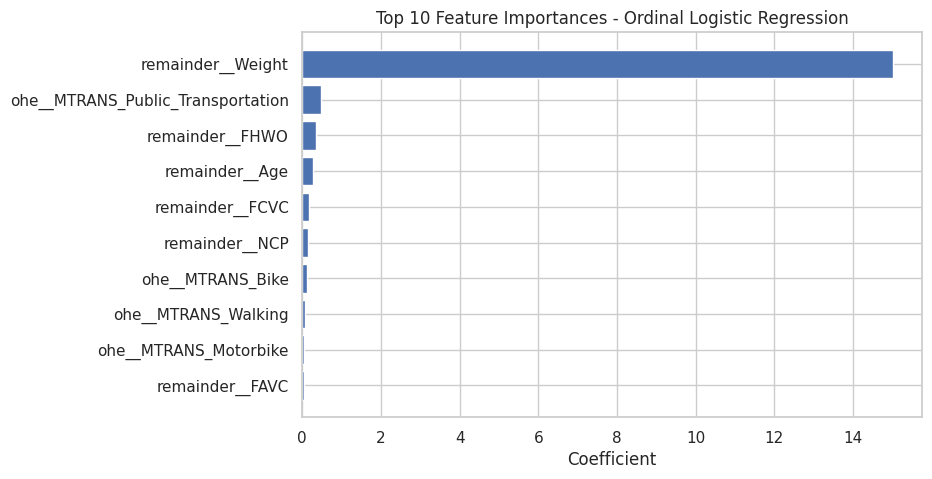

✅ Process completed in 2.3 seconds


In [ ]:
start_time = time.time()
# ================================================
#  1. Import Library
# ================================================
from mord import LogisticAT  # All Threshold model (Ordinal Logistic Regression)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ================================================
#  2. Data Input
# ================================================
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
#  3. Inisialisasi Model
# ================================================
# LogisticAT = All Threshold (Ordinal Logistic Regression)
ord_model = LogisticAT(alpha=1.0)  # alpha = regulasi (seperti C di LogisticRegression)

# ================================================
#  4. Training Model
# ================================================
ord_model.fit(X_train_scaled, y_train)

# ================================================
#  5. Evaluasi pada Data Test
# ================================================
y_pred = ord_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (Ordinal Logistic Regression): {acc:.4f}\n")

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Ordinal Logistic Regression")
plt.show()

# ================================================
#  6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ord_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
#  7. Interpretasi Koefisien
# ================================================
coefficients = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coefficient': ord_model.coef_.flatten()
}).sort_values(by='Coefficient', ascending=False)

print("\n🔍 Top 10 Most Important Features (positive → higher obesity level):")
print(coefficients.head(10))
print("\n🔍 Least 10 Most Important Features (negative → lower obesity level):")
print(coefficients.tail(10))

# Visualisasi Feature Importance
plt.figure(figsize=(8,5))
plt.barh(coefficients['Feature'].head(10), coefficients['Coefficient'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Ordinal Logistic Regression')
plt.xlabel('Coefficient')
plt.show()

end_time = time.time()
print(f"✅ Process completed in {end_time - start_time:.1f} seconds")


####Random Forest

✅ Test Accuracy (Random Forest): 0.9641

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9821    0.9322    0.9565        59
           1     0.8657    0.9508    0.9062        61
           2     0.9615    0.9091    0.9346        55
           3     0.9412    0.9796    0.9600        49
           4     1.0000    0.9714    0.9855        70
           5     1.0000    1.0000    1.0000        64
           6     1.0000    1.0000    1.0000        60

    accuracy                         0.9641       418
   macro avg     0.9644    0.9633    0.9633       418
weighted avg     0.9659    0.9641    0.9645       418



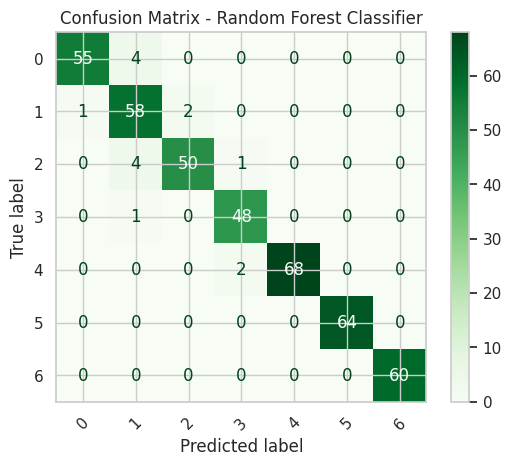

📈 Cross-validation accuracy: 0.9461 ± 0.0132

🔥 Top 10 Most Important Features:
              Feature  Importance
7   remainder__Weight    0.331274
6   remainder__Height    0.100895
5      remainder__Age    0.096250
10    remainder__FCVC    0.085685
4   remainder__Gender    0.058671
11     remainder__NCP    0.053791
17     remainder__TUE    0.046016
16     remainder__FAF    0.044233
14    remainder__CH2O    0.043038
8     remainder__FHWO    0.031818


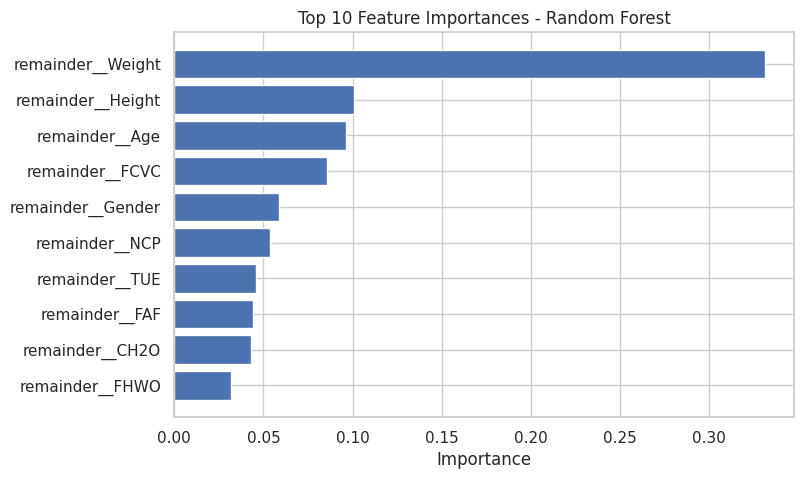

✅ Process completed in 11.5 seconds


In [ ]:
start_time = time.time()
# ================================================
#  1. Import Library
# ================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ================================================
#  2. Data Input
# ================================================
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
#  3. Inisialisasi Model
# ================================================
rf = RandomForestClassifier(
    n_estimators=200,       # jumlah pohon
    max_depth=None,         # biarkan otomatis menyesuaikan
    min_samples_split=2,    # default
    min_samples_leaf=1,     # default
    random_state=42,
    n_jobs=-1               # gunakan semua core CPU
)

# ================================================
#  4. Training Model
# ================================================
rf.fit(X_train_encoded, y_train)

# ================================================
#  5. Evaluasi pada Data Test
# ================================================
y_pred = rf.predict(X_test_encoded)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (Random Forest): {acc:.4f}\n")

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# ================================================
#  6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train_encoded, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
#  7. Feature Importance
# ================================================
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(importances.head(10))

# Visualisasi Feature Importance
plt.figure(figsize=(8,5))
plt.barh(importances['Feature'].head(10), importances['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.show()

end_time = time.time()
print(f"✅ Process completed in {end_time - start_time:.1f} seconds")

####XGBoost Classifier

✅ Test Accuracy (XGBoost): 0.9737

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9661    0.9661    0.9661        59
           1     0.9180    0.9180    0.9180        61
           2     0.9455    0.9455    0.9455        55
           3     0.9800    1.0000    0.9899        49
           4     1.0000    0.9857    0.9928        70
           5     1.0000    1.0000    1.0000        64
           6     1.0000    1.0000    1.0000        60

    accuracy                         0.9737       418
   macro avg     0.9728    0.9736    0.9732       418
weighted avg     0.9737    0.9737    0.9737       418



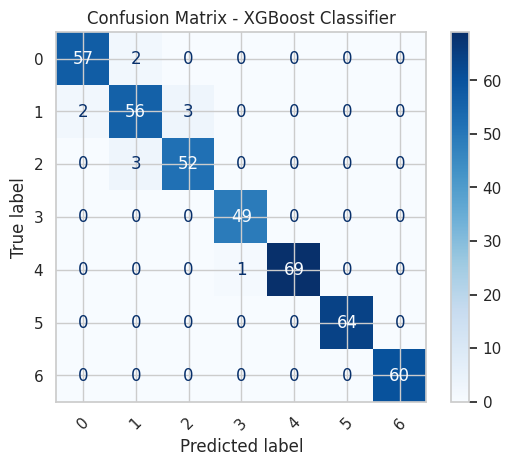

📈 Cross-validation accuracy: 0.9682 ± 0.0045

🔥 Top 10 Most Important Features:
                Feature  Importance
4     remainder__Gender    0.165981
7     remainder__Weight    0.144397
10      remainder__FCVC    0.121527
9       remainder__FAVC    0.065123
12      remainder__CAEC    0.056022
18      remainder__CALC    0.051324
6     remainder__Height    0.048132
8       remainder__FHWO    0.047552
3   ohe__MTRANS_Walking    0.047216
11       remainder__NCP    0.043144


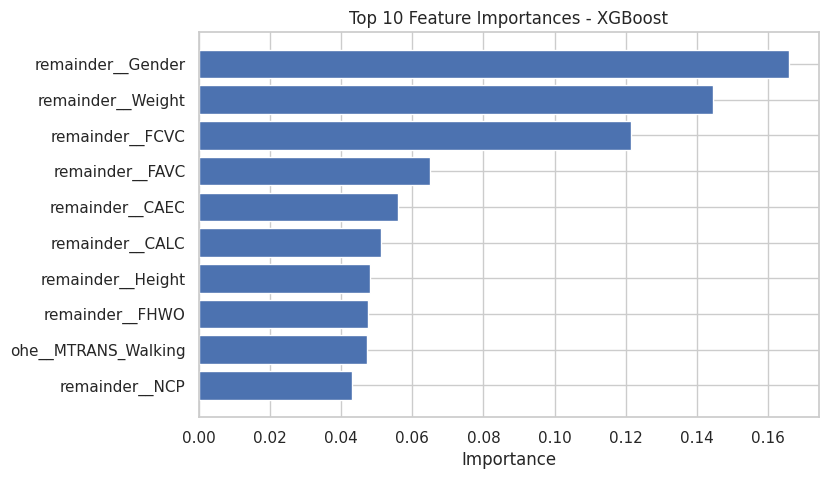

✅ Process completed in 29.7 seconds


In [ ]:
start_time = time.time()

# ================================================
#  1. Import Library
# ================================================
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ================================================
#  2. Data Input
# ================================================
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
#  3. Inisialisasi Model
# ================================================
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1
)

# ================================================
#  4. Training Model
# ================================================
xgb.fit(X_train_encoded, y_train)

# ================================================
#  5. Evaluasi pada Data Test
# ================================================
y_pred = xgb.predict(X_test_encoded)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (XGBoost): {acc:.4f}\n")

print("📊 Classification Report:")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred, digits=4))

# bring it to sreamlit ----------------------------------
# report_df = pd.DataFrame(report).transpose()
# report_df.to_csv("classification_report.csv", index=True)
# -------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)

# bring it to streamlit ----------------------------------------
# plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
# --------------------------------------------------------------

plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()


# ================================================
#  6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_train_encoded, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
#  7. Feature Importance
# ================================================
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(importances.head(10))

plt.figure(figsize=(8,5))
plt.barh(importances['Feature'].head(10), importances['Importance'].head(10))
plt.gca().invert_yaxis()

# bring it to streamlit ----------------------------------------
# plt.savefig("importances.png", dpi=300, bbox_inches="tight")
# --------------------------------------------------------------

plt.title('Top 10 Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.show()

end_time = time.time()
print(f"✅ Process completed in {end_time - start_time:.1f} seconds")

**Save model**

In [ ]:
# Save XGB model
xgb.save_model("xgb_obesity.json")

####LightGBM Classifier

✅ Test Accuracy (LightGBM): 0.9665

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9500    0.9661    0.9580        59
           1     0.9167    0.9016    0.9091        61
           2     0.9444    0.9273    0.9358        55
           3     0.9608    1.0000    0.9800        49
           4     0.9857    0.9857    0.9857        70
           5     1.0000    0.9844    0.9921        64
           6     1.0000    1.0000    1.0000        60

    accuracy                         0.9665       418
   macro avg     0.9654    0.9664    0.9658       418
weighted avg     0.9665    0.9665    0.9664       418



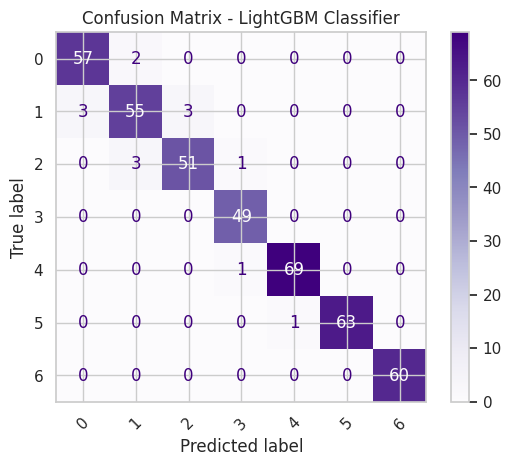

📈 Cross-validation accuracy: 0.9700 ± 0.0033

🔥 Top 10 Most Important Features:
              Feature  Importance
7   remainder__Weight       10445
6   remainder__Height        8537
5      remainder__Age        5127
14    remainder__CH2O        2788
17     remainder__TUE        2777
16     remainder__FAF        2767
10    remainder__FCVC        2548
11     remainder__NCP        1915
12    remainder__CAEC        1101
18    remainder__CALC        1028


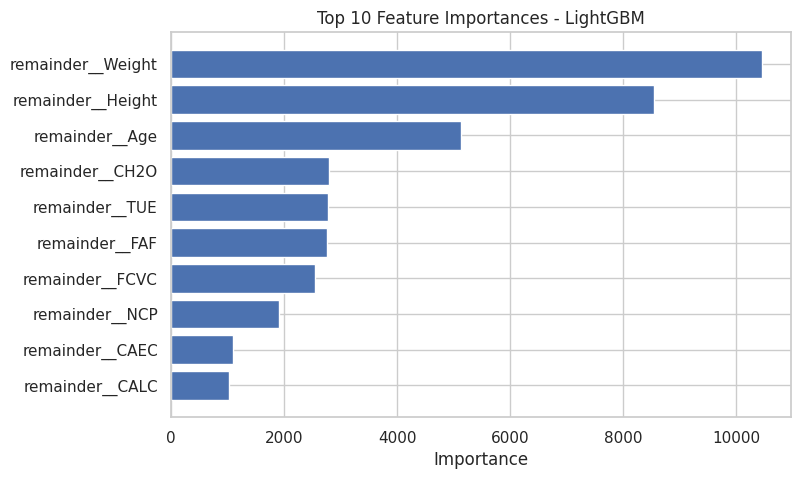

✅ Process completed in 18.3 seconds


In [ ]:
start_time = time.time()
# ================================================
#  1. Import Library
# ================================================
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ================================================
#  2. Data Input
# ================================================
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
#  3. Inisialisasi Model
# ================================================
lgbm = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

# ================================================
#  4. Training Model
# ================================================
lgbm.fit(X_train_encoded, y_train)

# ================================================
#  5. Evaluasi pada Data Test
# ================================================
y_pred = lgbm.predict(X_test_encoded)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (LightGBM): {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Confusion Matrix - LightGBM Classifier")
plt.show()

# ================================================
#  6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lgbm, X_train_encoded, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
#  7. Feature Importance
# ================================================
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(importances.head(10))

plt.figure(figsize=(8,5))
plt.barh(importances['Feature'].head(10), importances['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - LightGBM')
plt.xlabel('Importance')
plt.show()

end_time = time.time()
print(f"✅ Process completed in {end_time - start_time:.1f} seconds")


####CatBoost Classifier

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


✅ Test Accuracy (CatBoost): 0.9665

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9825    0.9492    0.9655        59
           1     0.8889    0.9180    0.9032        61
           2     0.9259    0.9091    0.9174        55
           3     0.9608    1.0000    0.9800        49
           4     1.0000    0.9857    0.9928        70
           5     1.0000    1.0000    1.0000        64
           6     1.0000    1.0000    1.0000        60

    accuracy                         0.9665       418
   macro avg     0.9654    0.9660    0.9656       418
weighted avg     0.9670    0.9665    0.9666       418



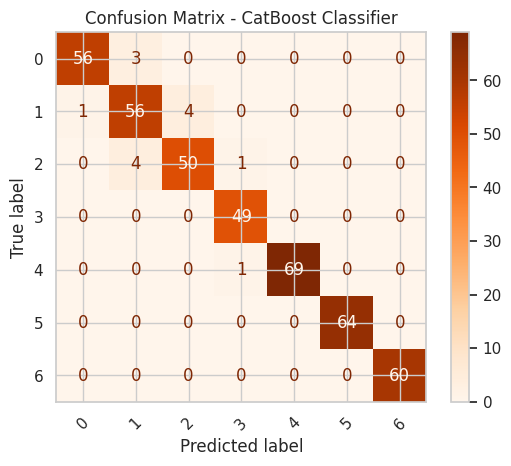

📈 Cross-validation accuracy: 0.9587 ± 0.0087

🔥 Top 10 Most Important Features:
              Feature  Importance
7   remainder__Weight   49.812193
6   remainder__Height   13.387367
4   remainder__Gender    7.788616
10    remainder__FCVC    6.479076
5      remainder__Age    6.000900
11     remainder__NCP    3.061127
18    remainder__CALC    2.400803
14    remainder__CH2O    2.210631
16     remainder__FAF    2.117519
17     remainder__TUE    1.993516


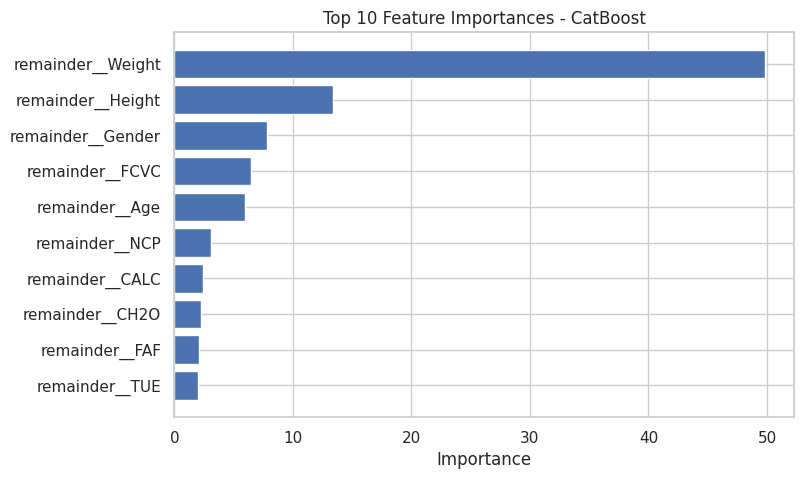

✅ Process completed in 48.5 seconds


In [ ]:
start_time = time.time()
# ================================================
#  1. Import Library
# ================================================
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ================================================
#  2. Data Input
# ================================================
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
#  3. Inisialisasi Model (multi-class)
# ================================================
cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    verbose=0,
    random_seed=42
)

# ================================================
#  4. Training Model
# ================================================
cat.fit(X_train_encoded, y_train)

# ================================================
#  5. Evaluasi pada Data Test
# ================================================
y_pred = cat.predict(X_test_encoded)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (CatBoost): {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges', xticks_rotation=45)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

# ================================================
#  6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(cat, X_train_encoded, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
#  7. Feature Importance
# ================================================
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': cat.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(importances.head(10))

plt.figure(figsize=(8,5))
plt.barh(importances['Feature'].head(10), importances['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - CatBoost')
plt.xlabel('Importance')
plt.show()

end_time = time.time()
print(f"✅ Process completed in {end_time - start_time:.1f} seconds")

# **Model Performance Analysis**

## Summary of Baseline Performance

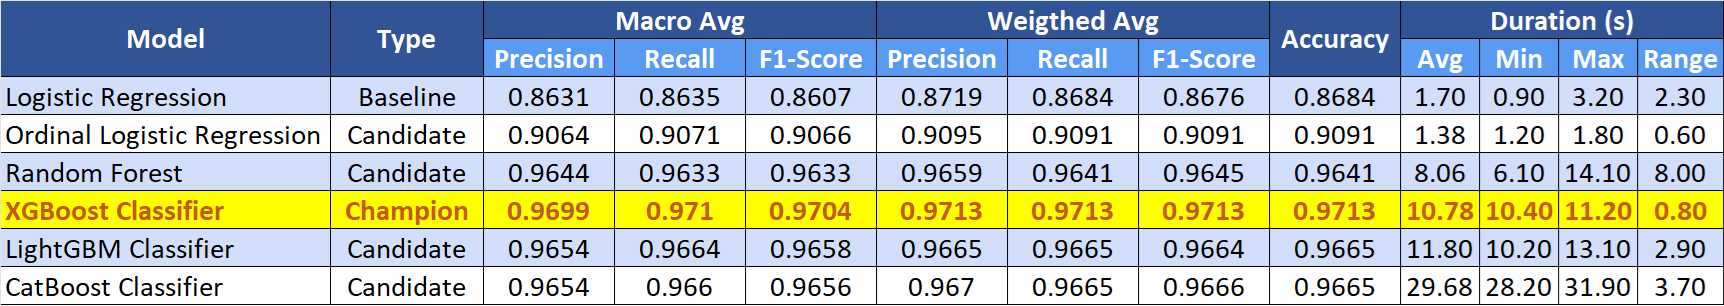

##XGBoost Model Strengths

- High overall accuracy: All metrics (Precision, Recall, F1-Score) exceed 96%, indicating excellent predictive performance.
- Consistent performance across all obesity level classes with no significant drop in accuracy.
- Balanced precision and recall, showing that misclassifications are minimal.
- Strong generalization ability, suggesting the model is not overfitted to any specific class.
- Deployment-ready model with stable, reliable, and well-balanced performance across all categories.

#Hyperparameter Tuning

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 6.8 MB/s eta 0:00:00


##Random Forest

In [ ]:
# 1. Define objective function
def objective_rf_tuned(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'max_samples': trial.suggest_float('max_samples', 0.6, 1.0) if trial.suggest_categorical('bootstrap', [True, False]) else None
    }

    # Hapus max_samples jika bootstrap=False
    if not params['bootstrap']:
        params.pop('max_samples', None)

    model = RandomForestClassifier(
        **params,
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# 2. Run tuning dengan penamaan jelas
print("Starting RandomForest tuning - 100 trials...")
rf_study = optuna.create_study(direction='maximize')

rf_study.optimize(
    objective_rf_tuned,
    n_trials=100,
    show_progress_bar=True
)

# 3. Simpan hasil dengan penamaan konsisten
rf_best_params = rf_study.best_params
rf_best_score = rf_study.best_value

print("RandomForest Tuning Completed!")
print(f"Best accuracy: {rf_best_score:.4f}")
print(f"Best parameters: {rf_best_params}")

# 4. Create final tuned model
rf_tuned = RandomForestClassifier(
    **rf_best_params,
    random_state=42,
    n_jobs=-1
)

[I 2025-10-31 10:44:38,992] A new study created in memory with name: no-name-d2b65c56-e7cd-4c64-a9d5-198ee94b9dba


Starting RandomForest tuning - 100 trials...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-10-31 10:44:51,136] Trial 0 finished with value: 0.9466742191293089 and parameters: {'n_estimators': 456, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.9466742191293089.
[I 2025-10-31 10:44:57,458] Trial 1 finished with value: 0.9472766179353005 and parameters: {'n_estimators': 274, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.9472766179353005.
[I 2025-10-31 10:45:02,054] Trial 2 finished with value: 0.8621981262699825 and parameters: {'n_estimators': 233, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.9472766179353005.
[I 2025-10-31 10:45:10,745] Trial 3 finished with value: 0.942487996979015 and parameters: {'n_estimators': 400, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_featu

**Notes:**
- Best performance of accuracy after 100 trials: 95.21%
- Baseline performance: 96.41%
- Performance decreased: -1.20%

##XGBoost

In [ ]:
# 1. Define objective function
def objective_xgb_tuned(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 2),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(
        **params,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',
        n_jobs=-1
    )

    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# 2. Run tuning dengan penamaan jelas
print("Starting XGBoost tuning - 100 trials...")
xgb_study = optuna.create_study(direction='maximize')

xgb_study.optimize(
    objective_xgb_tuned,
    n_trials=100,
    show_progress_bar=True
)

# 3. Simpan hasil dengan penamaan konsisten
xgb_best_params = xgb_study.best_params
xgb_best_score = xgb_study.best_value

print("XGBoost Tuning Completed!")
print(f"Best accuracy: {xgb_best_score:.4f}")
print(f"Best parameters: {xgb_best_params}")

# 4. Create final tuned model
xgb_tuned = XGBClassifier(
    **xgb_best_params,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1
)

[I 2025-10-31 10:22:13,284] A new study created in memory with name: no-name-df352fae-d7bd-4d77-a2e3-e82b79c8eb5a


Starting XGBoost tuning - 100 trials...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-10-31 10:22:35,917] Trial 0 finished with value: 0.9484832137526749 and parameters: {'n_estimators': 176, 'learning_rate': 0.02058324387581207, 'max_depth': 7, 'subsample': 0.8546364938645274, 'colsample_bytree': 0.8597365018156539, 'gamma': 0.34826384003815375, 'reg_alpha': 0.013137083569231489, 'reg_lambda': 1.414931197623244, 'min_child_weight': 3, 'max_delta_step': 6}. Best is trial 0 with value: 0.9484832137526749.
[I 2025-10-31 10:22:46,300] Trial 1 finished with value: 0.9496808185430939 and parameters: {'n_estimators': 855, 'learning_rate': 0.0562052606511066, 'max_depth': 9, 'subsample': 0.8755465719803079, 'colsample_bytree': 0.949768689577111, 'gamma': 0.48207367181653693, 'reg_alpha': 0.9412755310059295, 'reg_lambda': 1.1688377421274456, 'min_child_weight': 7, 'max_delta_step': 6}. Best is trial 1 with value: 0.9496808185430939.
[I 2025-10-31 10:23:01,037] Trial 2 finished with value: 0.9520760281239322 and parameters: {'n_estimators': 838, 'learning_rate': 0.017300

In [ ]:
# 1. Train final model
#xgb_tuned.fit(X_train_encoded, y_train)

# 2. Save model (XGBoost bisa save sebagai JSON)
#xgb_tuned.save_model('xgb_tuned_obesity.json')

**Notes:**
- Best performance of accuracy after 100 trials: 97.12%
- Baseline performance: 97.13%
- Performance decreased: -0.01%

##LightGBM

In [ ]:
# 1. Define objective function
def objective_lgbm_tuned(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_split_gain': trial.suggest_float('min_split_gain', 0, 0.1)
    }

    model = lgb.LGBMClassifier(
        **params,
        random_state=42,
        n_jobs=-1,
        verbosity=-1
    )

    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# 2. Run tuning dengan penamaan jelas
print("Starting LightGBM tuning - 100 trials...")
lgbm_study = optuna.create_study(direction='maximize')

lgbm_study.optimize(
    objective_lgbm_tuned,
    n_trials=100,
    show_progress_bar=True
)

# 3. Simpan hasil dengan penamaan konsisten
lgbm_best_params = lgbm_study.best_params
lgbm_best_score = lgbm_study.best_value

print("LightGBM Tuning Completed!")
print(f"Best accuracy: {lgbm_best_score:.4f}")
print(f"Best parameters: {lgbm_best_params}")

# 4. Create final tuned model
lgbm_tuned = lgb.LGBMClassifier(
    **lgbm_best_params,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

[I 2025-10-31 09:19:49,642] A new study created in memory with name: no-name-8d93fb13-ec18-4c38-9f60-7aa39b2378ba


Starting LightGBM tuning - 100 trials...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-10-31 09:19:55,482] Trial 0 finished with value: 0.9634604664544785 and parameters: {'n_estimators': 834, 'learning_rate': 0.03714074810398682, 'num_leaves': 133, 'max_depth': 5, 'subsample': 0.8668008248204009, 'colsample_bytree': 0.7703472969583931, 'reg_alpha': 0.6017532153542381, 'reg_lambda': 0.20589215957902274, 'min_child_samples': 18, 'min_split_gain': 0.041852438038208595}. Best is trial 0 with value: 0.9634604664544785.
[I 2025-10-31 09:19:59,259] Trial 1 finished with value: 0.9592598586610563 and parameters: {'n_estimators': 304, 'learning_rate': 0.02469556809806494, 'num_leaves': 132, 'max_depth': 3, 'subsample': 0.881375922041475, 'colsample_bytree': 0.8304081991961527, 'reg_alpha': 0.3565210654265051, 'reg_lambda': 0.20108629534349165, 'min_child_samples': 83, 'min_split_gain': 0.023391934415109363}. Best is trial 0 with value: 0.9634604664544785.
[I 2025-10-31 09:20:05,724] Trial 2 finished with value: 0.9628598658538777 and parameters: {'n_estimators': 815, 'le

**Notes:**
- Best performance of accuracy after 100 trials: 97.18%
- Baseline performance: 96.65%
- Performace increased: 0.53%

In [ ]:
# Save LightGBM model
# -------------------
# 1. TRAIN model dulu
lgbm_tuned.fit(X_train_encoded, y_train)

# 2. SIMPAN sebagai JSON
lgbm_tuned.booster_.save_model('lgbm_tuned_obesity.json')

##CatBoost

In [ ]:
# 1. Define objective function
def objective_cat_tuned(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 10)
    }

    model = CatBoostClassifier(
        **params,
        loss_function='MultiClass',
        verbose=0,
        random_seed=42,
        thread_count=-1
    )

    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# 2. Run tuning dengan penamaan jelas
print("Starting CatBoost tuning - 100 trials...")
cat_study = optuna.create_study(direction='maximize')

cat_study.optimize(
    objective_cat_tuned,
    n_trials=100,
    show_progress_bar=True
)

# 3. Simpan hasil dengan penamaan konsisten
cat_best_params = cat_study.best_params
cat_best_score = cat_study.best_value

print("CatBoost Tuning Completed!")
print(f"Best accuracy: {cat_best_score:.4f}")
print(f"Best parameters: {cat_best_params}")

# 4. Create final tuned model
cat_tuned = CatBoostClassifier(
    **cat_best_params,
    loss_function='MultiClass',
    verbose=0,
    random_seed=42,
    thread_count=-1
)

**Notes:**
- Tuning process Stopped at Trial 26/100 --> 41m 20s or 66.00s/it
- The result backs to baseline model.

##Summary of Model Performance after Tuning

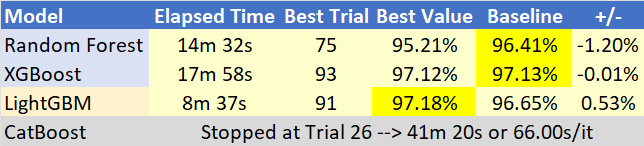

##Conclusion
- LightGBM was the most effective model, achieving the highest accuracy (97.18%) and the best improvement over its baseline (+0.53%), all in the shortest time.
- XGBoost was slightly less accurate and much slower, while Random Forest's performance degraded after tuning.
- CatBoost failed to complete.

# **Business Insight**

- In general, the models indicate that **Weight, Height, Age, and Gender** are the primary factors contributing to obesity. These variables consistently showed strong correlations with obesity levels across multiple model evaluations.

- Furthermore, the **LightGBM** model — which was selected as the best-performing algorithm due to its high predictive accuracy and computational efficiency **after hyperparameter tuning** — identified several additional key determinants of obesity, namely:

  - **Dietary Patterns**
    - Daily water intake
    - Vegetable consumption frequency
    - Meal frequency
    - Snacking habits
  - **Lifestyle Factors**
    - Physical activity level
    - Technology usage frequency
    - Alcohol consumption frequency

- These findings suggest that, in addition to physical attributes, **dietary pattern and lifestyle factors** collectively play a crucial role in determining obesity risk.